## Content

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

To locate a pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27. The pixel is located on row i and column j of a 28 x 28 matrix.
For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram below.


Labels

Each training and test example is assigned to one of the following labels:

0 T-shirt/top

1 Trouser

2 Pullover

3 Dress

4 Coat

5 Sandal

6 Shirt

7 Sneaker

8 Bag

9 Ankle boot

In [16]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, Conv2D, Activation, Flatten, MaxPooling2D
from tensorflow.keras import Sequential
from tensorflow.keras.datasets import fashion_mnist
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
from matplotlib import pyplot  as plt
import pandas as pd
import numpy as np
import seaborn as sn
import time

In [6]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
x_test.shape

(10000, 28, 28)

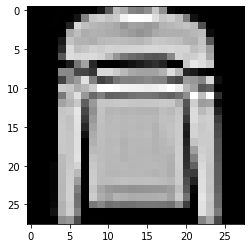

In [9]:
plt.imshow(x_train[5], cmap="gray")
plt.show()

In [10]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [26]:
def create_model(hp):
    model = Sequential()
    
    model.add(Conv2D(hp.Int("input_units", min_value = 32, max_value = 256, step = 30), (3, 3), input_shape=x_train.shape[1:]))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    for i in range(hp.Int(f"conv_{1}_units", 1, 6)):
        model.add(Conv2D(hp.Int("input_units", min_value = 32, max_value = 360, step = 80), (3, 3)))
        model.add(Activation('relu'))
        
    
    model.add(Flatten())
    
    model.add(Dense(units=10))
    model.add(Activation('softmax'))
    
    model.compile(
        optimizer = 'adam',
        loss = "sparse_categorical_crossentropy",
        metrics = ['accuracy']
    )
    
    return model

In [27]:
# model = create_model()

In [28]:
# model.fit(x_train, y_train, batch_size=64, epochs=5, verbose=0, validation_data=(x_test, y_test))

In [31]:
LOG_DIR = f"{int(time.time())}"

In [32]:
tuner = RandomSearch(create_model,
                     objective = "val_accuracy",
                     max_trials = 1,
                     executions_per_trial = 2,
                     directory = LOG_DIR
                    )

In [34]:
tuner.search(x = x_train,
            y = y_train,
            validation_data = (x_test, y_test),
            epochs = 1,
            batch_size = 65
            )

185/924 [=====>........................] - ETA: 0s - loss: 36.9512 - accuracy: 0.138 - ETA: 1:18 - loss: 32.3210 - accuracy: 0.069 - ETA: 1:29 - loss: 29.4747 - accuracy: 0.087 - ETA: 1:55 - loss: 27.0204 - accuracy: 0.100 - ETA: 1:59 - loss: 25.4121 - accuracy: 0.113 - ETA: 1:57 - loss: 23.2745 - accuracy: 0.141 - ETA: 2:01 - loss: 21.6470 - accuracy: 0.164 - ETA: 2:02 - loss: 20.2437 - accuracy: 0.178 - ETA: 2:03 - loss: 18.9380 - accuracy: 0.194 - ETA: 2:04 - loss: 17.6454 - accuracy: 0.215 - ETA: 2:02 - loss: 16.4741 - accuracy: 0.237 - ETA: 2:02 - loss: 15.4416 - accuracy: 0.259 - ETA: 2:03 - loss: 14.4842 - accuracy: 0.276 - ETA: 2:02 - loss: 13.7571 - accuracy: 0.287 - ETA: 2:00 - loss: 13.0352 - accuracy: 0.306 - ETA: 2:00 - loss: 12.5832 - accuracy: 0.315 - ETA: 1:59 - loss: 12.1062 - accuracy: 0.323 - ETA: 1:58 - loss: 11.7028 - accuracy: 0.328 - ETA: 1:58 - loss: 11.2939 - accuracy: 0.337 - ETA: 1:58 - loss: 10.9886 - accuracy: 0.340 - ETA: 1:57 - loss: 10.6265 - accuracy: 0

371/924 [===========>..................] - ETA: 1:32 - loss: 2.5006 - accuracy: 0.64 - ETA: 1:32 - loss: 2.4948 - accuracy: 0.64 - ETA: 1:32 - loss: 2.4873 - accuracy: 0.64 - ETA: 1:32 - loss: 2.4787 - accuracy: 0.64 - ETA: 1:32 - loss: 2.4700 - accuracy: 0.64 - ETA: 1:32 - loss: 2.4617 - accuracy: 0.64 - ETA: 1:32 - loss: 2.4559 - accuracy: 0.64 - ETA: 1:32 - loss: 2.4505 - accuracy: 0.64 - ETA: 1:31 - loss: 2.4428 - accuracy: 0.64 - ETA: 1:31 - loss: 2.4386 - accuracy: 0.64 - ETA: 1:31 - loss: 2.4302 - accuracy: 0.64 - ETA: 1:31 - loss: 2.4232 - accuracy: 0.64 - ETA: 1:31 - loss: 2.4148 - accuracy: 0.64 - ETA: 1:31 - loss: 2.4098 - accuracy: 0.64 - ETA: 1:31 - loss: 2.4024 - accuracy: 0.64 - ETA: 1:31 - loss: 2.3957 - accuracy: 0.64 - ETA: 1:31 - loss: 2.3893 - accuracy: 0.64 - ETA: 1:31 - loss: 2.3821 - accuracy: 0.64 - ETA: 1:31 - loss: 2.3743 - accuracy: 0.64 - ETA: 1:31 - loss: 2.3689 - accuracy: 0.64 - ETA: 1:31 - loss: 2.3624 - accuracy: 0.64 - ETA: 1:31 - loss: 2.3557 - accura

557/924 [=================>............] - ETA: 1:15 - loss: 1.6662 - accuracy: 0.69 - ETA: 1:15 - loss: 1.6633 - accuracy: 0.69 - ETA: 1:14 - loss: 1.6600 - accuracy: 0.69 - ETA: 1:14 - loss: 1.6567 - accuracy: 0.69 - ETA: 1:14 - loss: 1.6534 - accuracy: 0.70 - ETA: 1:14 - loss: 1.6517 - accuracy: 0.70 - ETA: 1:14 - loss: 1.6492 - accuracy: 0.70 - ETA: 1:14 - loss: 1.6465 - accuracy: 0.70 - ETA: 1:14 - loss: 1.6436 - accuracy: 0.70 - ETA: 1:14 - loss: 1.6421 - accuracy: 0.70 - ETA: 1:14 - loss: 1.6392 - accuracy: 0.70 - ETA: 1:14 - loss: 1.6370 - accuracy: 0.70 - ETA: 1:13 - loss: 1.6346 - accuracy: 0.70 - ETA: 1:13 - loss: 1.6328 - accuracy: 0.70 - ETA: 1:13 - loss: 1.6308 - accuracy: 0.70 - ETA: 1:13 - loss: 1.6286 - accuracy: 0.70 - ETA: 1:13 - loss: 1.6258 - accuracy: 0.70 - ETA: 1:13 - loss: 1.6236 - accuracy: 0.70 - ETA: 1:13 - loss: 1.6211 - accuracy: 0.70 - ETA: 1:13 - loss: 1.6181 - accuracy: 0.70 - ETA: 1:13 - loss: 1.6159 - accuracy: 0.70 - ETA: 1:12 - loss: 1.6137 - accura

743/924 [=======================>......] - ETA: 49s - loss: 1.3491 - accuracy: 0.725 - ETA: 49s - loss: 1.3476 - accuracy: 0.725 - ETA: 48s - loss: 1.3464 - accuracy: 0.725 - ETA: 48s - loss: 1.3455 - accuracy: 0.725 - ETA: 48s - loss: 1.3441 - accuracy: 0.725 - ETA: 48s - loss: 1.3428 - accuracy: 0.725 - ETA: 48s - loss: 1.3419 - accuracy: 0.725 - ETA: 48s - loss: 1.3416 - accuracy: 0.725 - ETA: 48s - loss: 1.3401 - accuracy: 0.725 - ETA: 47s - loss: 1.3389 - accuracy: 0.726 - ETA: 47s - loss: 1.3377 - accuracy: 0.726 - ETA: 47s - loss: 1.3365 - accuracy: 0.726 - ETA: 47s - loss: 1.3352 - accuracy: 0.726 - ETA: 47s - loss: 1.3338 - accuracy: 0.726 - ETA: 47s - loss: 1.3326 - accuracy: 0.726 - ETA: 47s - loss: 1.3311 - accuracy: 0.726 - ETA: 46s - loss: 1.3304 - accuracy: 0.726 - ETA: 46s - loss: 1.3290 - accuracy: 0.726 - ETA: 46s - loss: 1.3281 - accuracy: 0.726 - ETA: 46s - loss: 1.3267 - accuracy: 0.727 - ETA: 46s - loss: 1.3258 - accuracy: 0.727 - ETA: 46s - loss: 1.3248 - accurac

924/924 [==============================] - ETA: 24s - loss: 1.1746 - accuracy: 0.741 - ETA: 24s - loss: 1.1737 - accuracy: 0.741 - ETA: 23s - loss: 1.1731 - accuracy: 0.741 - ETA: 23s - loss: 1.1726 - accuracy: 0.741 - ETA: 23s - loss: 1.1718 - accuracy: 0.741 - ETA: 23s - loss: 1.1709 - accuracy: 0.741 - ETA: 23s - loss: 1.1699 - accuracy: 0.742 - ETA: 23s - loss: 1.1690 - accuracy: 0.742 - ETA: 23s - loss: 1.1681 - accuracy: 0.742 - ETA: 22s - loss: 1.1673 - accuracy: 0.742 - ETA: 22s - loss: 1.1662 - accuracy: 0.742 - ETA: 22s - loss: 1.1654 - accuracy: 0.742 - ETA: 22s - loss: 1.1650 - accuracy: 0.742 - ETA: 22s - loss: 1.1643 - accuracy: 0.742 - ETA: 22s - loss: 1.1632 - accuracy: 0.742 - ETA: 22s - loss: 1.1625 - accuracy: 0.742 - ETA: 22s - loss: 1.1619 - accuracy: 0.742 - ETA: 21s - loss: 1.1608 - accuracy: 0.743 - ETA: 21s - loss: 1.1605 - accuracy: 0.743 - ETA: 21s - loss: 1.1599 - accuracy: 0.743 - ETA: 21s - loss: 1.1592 - accuracy: 0.743 - ETA: 21s - loss: 1.1588 - accurac

185/924 [=====>........................] - ETA: 0s - loss: 44.8361 - accuracy: 0.107 - ETA: 1:07 - loss: 40.0764 - accuracy: 0.138 - ETA: 1:26 - loss: 35.2020 - accuracy: 0.164 - ETA: 1:32 - loss: 30.8834 - accuracy: 0.169 - ETA: 1:38 - loss: 27.7687 - accuracy: 0.178 - ETA: 1:42 - loss: 25.2675 - accuracy: 0.189 - ETA: 1:44 - loss: 23.1033 - accuracy: 0.204 - ETA: 1:44 - loss: 21.4857 - accuracy: 0.209 - ETA: 1:44 - loss: 20.2361 - accuracy: 0.222 - ETA: 1:44 - loss: 18.9158 - accuracy: 0.229 - ETA: 1:47 - loss: 17.7856 - accuracy: 0.236 - ETA: 1:47 - loss: 16.7546 - accuracy: 0.257 - ETA: 1:49 - loss: 16.0196 - accuracy: 0.274 - ETA: 1:49 - loss: 15.4428 - accuracy: 0.284 - ETA: 1:50 - loss: 14.8173 - accuracy: 0.296 - ETA: 1:50 - loss: 14.2558 - accuracy: 0.301 - ETA: 1:51 - loss: 13.6511 - accuracy: 0.309 - ETA: 1:50 - loss: 13.1190 - accuracy: 0.319 - ETA: 1:50 - loss: 12.5801 - accuracy: 0.334 - ETA: 1:49 - loss: 12.1488 - accuracy: 0.343 - ETA: 1:49 - loss: 11.7938 - accuracy: 0

371/924 [===========>..................] - ETA: 1:44 - loss: 2.6903 - accuracy: 0.64 - ETA: 1:44 - loss: 2.6788 - accuracy: 0.64 - ETA: 1:44 - loss: 2.6685 - accuracy: 0.64 - ETA: 1:43 - loss: 2.6594 - accuracy: 0.64 - ETA: 1:43 - loss: 2.6494 - accuracy: 0.64 - ETA: 1:43 - loss: 2.6421 - accuracy: 0.64 - ETA: 1:43 - loss: 2.6312 - accuracy: 0.64 - ETA: 1:43 - loss: 2.6214 - accuracy: 0.65 - ETA: 1:43 - loss: 2.6117 - accuracy: 0.65 - ETA: 1:43 - loss: 2.6021 - accuracy: 0.65 - ETA: 1:43 - loss: 2.5933 - accuracy: 0.65 - ETA: 1:43 - loss: 2.5848 - accuracy: 0.65 - ETA: 1:43 - loss: 2.5767 - accuracy: 0.65 - ETA: 1:43 - loss: 2.5704 - accuracy: 0.65 - ETA: 1:43 - loss: 2.5624 - accuracy: 0.65 - ETA: 1:43 - loss: 2.5513 - accuracy: 0.65 - ETA: 1:42 - loss: 2.5418 - accuracy: 0.65 - ETA: 1:42 - loss: 2.5321 - accuracy: 0.65 - ETA: 1:42 - loss: 2.5265 - accuracy: 0.65 - ETA: 1:42 - loss: 2.5202 - accuracy: 0.65 - ETA: 1:42 - loss: 2.5131 - accuracy: 0.65 - ETA: 1:42 - loss: 2.5049 - accura

557/924 [=================>............] - ETA: 1:20 - loss: 1.7619 - accuracy: 0.70 - ETA: 1:20 - loss: 1.7592 - accuracy: 0.70 - ETA: 1:20 - loss: 1.7559 - accuracy: 0.70 - ETA: 1:20 - loss: 1.7531 - accuracy: 0.70 - ETA: 1:20 - loss: 1.7503 - accuracy: 0.70 - ETA: 1:20 - loss: 1.7477 - accuracy: 0.70 - ETA: 1:20 - loss: 1.7451 - accuracy: 0.70 - ETA: 1:20 - loss: 1.7424 - accuracy: 0.70 - ETA: 1:19 - loss: 1.7398 - accuracy: 0.70 - ETA: 1:19 - loss: 1.7371 - accuracy: 0.70 - ETA: 1:19 - loss: 1.7346 - accuracy: 0.70 - ETA: 1:19 - loss: 1.7317 - accuracy: 0.70 - ETA: 1:19 - loss: 1.7295 - accuracy: 0.70 - ETA: 1:19 - loss: 1.7275 - accuracy: 0.70 - ETA: 1:19 - loss: 1.7240 - accuracy: 0.70 - ETA: 1:19 - loss: 1.7211 - accuracy: 0.70 - ETA: 1:19 - loss: 1.7187 - accuracy: 0.70 - ETA: 1:19 - loss: 1.7155 - accuracy: 0.70 - ETA: 1:18 - loss: 1.7124 - accuracy: 0.70 - ETA: 1:18 - loss: 1.7098 - accuracy: 0.70 - ETA: 1:18 - loss: 1.7068 - accuracy: 0.70 - ETA: 1:18 - loss: 1.7042 - accura

743/924 [=======================>......] - ETA: 53s - loss: 1.3952 - accuracy: 0.731 - ETA: 53s - loss: 1.3935 - accuracy: 0.731 - ETA: 53s - loss: 1.3916 - accuracy: 0.731 - ETA: 52s - loss: 1.3901 - accuracy: 0.731 - ETA: 52s - loss: 1.3892 - accuracy: 0.731 - ETA: 52s - loss: 1.3879 - accuracy: 0.731 - ETA: 52s - loss: 1.3861 - accuracy: 0.731 - ETA: 52s - loss: 1.3845 - accuracy: 0.732 - ETA: 52s - loss: 1.3835 - accuracy: 0.732 - ETA: 52s - loss: 1.3825 - accuracy: 0.732 - ETA: 51s - loss: 1.3807 - accuracy: 0.732 - ETA: 51s - loss: 1.3793 - accuracy: 0.732 - ETA: 51s - loss: 1.3776 - accuracy: 0.732 - ETA: 51s - loss: 1.3758 - accuracy: 0.732 - ETA: 51s - loss: 1.3739 - accuracy: 0.733 - ETA: 51s - loss: 1.3732 - accuracy: 0.733 - ETA: 51s - loss: 1.3722 - accuracy: 0.733 - ETA: 50s - loss: 1.3715 - accuracy: 0.733 - ETA: 50s - loss: 1.3700 - accuracy: 0.733 - ETA: 50s - loss: 1.3686 - accuracy: 0.733 - ETA: 50s - loss: 1.3670 - accuracy: 0.733 - ETA: 50s - loss: 1.3658 - accurac

924/924 [==============================] - ETA: 26s - loss: 1.1991 - accuracy: 0.749 - ETA: 26s - loss: 1.1984 - accuracy: 0.749 - ETA: 25s - loss: 1.1980 - accuracy: 0.749 - ETA: 25s - loss: 1.1969 - accuracy: 0.749 - ETA: 25s - loss: 1.1962 - accuracy: 0.749 - ETA: 25s - loss: 1.1951 - accuracy: 0.749 - ETA: 25s - loss: 1.1944 - accuracy: 0.749 - ETA: 25s - loss: 1.1940 - accuracy: 0.749 - ETA: 25s - loss: 1.1930 - accuracy: 0.749 - ETA: 24s - loss: 1.1921 - accuracy: 0.749 - ETA: 24s - loss: 1.1910 - accuracy: 0.749 - ETA: 24s - loss: 1.1906 - accuracy: 0.749 - ETA: 24s - loss: 1.1900 - accuracy: 0.749 - ETA: 24s - loss: 1.1889 - accuracy: 0.749 - ETA: 24s - loss: 1.1884 - accuracy: 0.750 - ETA: 23s - loss: 1.1874 - accuracy: 0.750 - ETA: 23s - loss: 1.1863 - accuracy: 0.750 - ETA: 23s - loss: 1.1855 - accuracy: 0.750 - ETA: 23s - loss: 1.1849 - accuracy: 0.750 - ETA: 23s - loss: 1.1843 - accuracy: 0.750 - ETA: 23s - loss: 1.1831 - accuracy: 0.750 - ETA: 23s - loss: 1.1824 - accurac

INFO:tensorflow:Oracle triggered exit


In [35]:
tuner.results_summary();

In [53]:
best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]

In [54]:
best_model = tuner.hypermodel.build(best_hps)

In [55]:
best_model.fit(x_train, y_train, epochs = 10, validation_data = (x_test, y_test))

Epoch 1/10


 183/1875 [=>............................] - ETA: 0s - loss: 66.1139 - accuracy: 0.031 - ETA: 1:26 - loss: 58.9009 - accuracy: 0.031 - ETA: 1:58 - loss: 49.1456 - accuracy: 0.114 - ETA: 2:20 - loss: 43.2071 - accuracy: 0.101 - ETA: 2:29 - loss: 39.4084 - accuracy: 0.137 - ETA: 2:31 - loss: 35.6724 - accuracy: 0.145 - ETA: 2:28 - loss: 33.2878 - accuracy: 0.147 - ETA: 2:34 - loss: 31.2028 - accuracy: 0.140 - ETA: 2:33 - loss: 28.8372 - accuracy: 0.149 - ETA: 2:30 - loss: 27.0862 - accuracy: 0.159 - ETA: 2:30 - loss: 25.8807 - accuracy: 0.156 - ETA: 2:27 - loss: 24.6052 - accuracy: 0.171 - ETA: 2:31 - loss: 23.4369 - accuracy: 0.201 - ETA: 2:30 - loss: 22.1776 - accuracy: 0.221 - ETA: 2:28 - loss: 21.0480 - accuracy: 0.239 - ETA: 2:30 - loss: 20.0476 - accuracy: 0.252 - ETA: 2:29 - loss: 19.1679 - accuracy: 0.264 - ETA: 2:32 - loss: 18.5730 - accuracy: 0.277 - ETA: 2:31 - loss: 17.9361 - accuracy: 0.282 - ETA: 2:32 - loss: 17.3187 - accuracy: 0.285 - ETA: 2:32 - loss: 16.8030 - accuracy:

 369/1875 [====>.........................] - ETA: 2:35 - loss: 4.2122 - accuracy: 0.60 - ETA: 2:36 - loss: 4.1978 - accuracy: 0.60 - ETA: 2:36 - loss: 4.1868 - accuracy: 0.60 - ETA: 2:36 - loss: 4.1792 - accuracy: 0.60 - ETA: 2:36 - loss: 4.1647 - accuracy: 0.60 - ETA: 2:36 - loss: 4.1499 - accuracy: 0.60 - ETA: 2:36 - loss: 4.1337 - accuracy: 0.60 - ETA: 2:36 - loss: 4.1229 - accuracy: 0.60 - ETA: 2:36 - loss: 4.1099 - accuracy: 0.60 - ETA: 2:36 - loss: 4.1004 - accuracy: 0.60 - ETA: 2:36 - loss: 4.0945 - accuracy: 0.60 - ETA: 2:36 - loss: 4.0797 - accuracy: 0.61 - ETA: 2:37 - loss: 4.0675 - accuracy: 0.61 - ETA: 2:37 - loss: 4.0521 - accuracy: 0.61 - ETA: 2:37 - loss: 4.0409 - accuracy: 0.61 - ETA: 2:37 - loss: 4.0268 - accuracy: 0.61 - ETA: 2:36 - loss: 4.0141 - accuracy: 0.61 - ETA: 2:36 - loss: 4.0082 - accuracy: 0.61 - ETA: 2:36 - loss: 3.9938 - accuracy: 0.61 - ETA: 2:36 - loss: 3.9796 - accuracy: 0.61 - ETA: 2:36 - loss: 3.9682 - accuracy: 0.61 - ETA: 2:36 - loss: 3.9611 - accu

 555/1875 [=======>......................] - ETA: 2:21 - loss: 2.7684 - accuracy: 0.66 - ETA: 2:21 - loss: 2.7650 - accuracy: 0.66 - ETA: 2:21 - loss: 2.7583 - accuracy: 0.66 - ETA: 2:21 - loss: 2.7528 - accuracy: 0.66 - ETA: 2:20 - loss: 2.7470 - accuracy: 0.66 - ETA: 2:20 - loss: 2.7428 - accuracy: 0.66 - ETA: 2:20 - loss: 2.7392 - accuracy: 0.66 - ETA: 2:20 - loss: 2.7335 - accuracy: 0.66 - ETA: 2:20 - loss: 2.7278 - accuracy: 0.66 - ETA: 2:20 - loss: 2.7232 - accuracy: 0.66 - ETA: 2:19 - loss: 2.7190 - accuracy: 0.66 - ETA: 2:19 - loss: 2.7144 - accuracy: 0.66 - ETA: 2:19 - loss: 2.7087 - accuracy: 0.66 - ETA: 2:19 - loss: 2.7050 - accuracy: 0.66 - ETA: 2:19 - loss: 2.6993 - accuracy: 0.66 - ETA: 2:19 - loss: 2.6933 - accuracy: 0.66 - ETA: 2:19 - loss: 2.6886 - accuracy: 0.66 - ETA: 2:20 - loss: 2.6836 - accuracy: 0.66 - ETA: 2:19 - loss: 2.6805 - accuracy: 0.66 - ETA: 2:19 - loss: 2.6764 - accuracy: 0.66 - ETA: 2:19 - loss: 2.6710 - accuracy: 0.66 - ETA: 2:19 - loss: 2.6649 - accu

 741/1875 [==========>...................] - ETA: 2:02 - loss: 2.1436 - accuracy: 0.69 - ETA: 2:02 - loss: 2.1416 - accuracy: 0.69 - ETA: 2:02 - loss: 2.1396 - accuracy: 0.69 - ETA: 2:02 - loss: 2.1360 - accuracy: 0.69 - ETA: 2:02 - loss: 2.1339 - accuracy: 0.69 - ETA: 2:02 - loss: 2.1314 - accuracy: 0.69 - ETA: 2:02 - loss: 2.1294 - accuracy: 0.69 - ETA: 2:02 - loss: 2.1281 - accuracy: 0.69 - ETA: 2:02 - loss: 2.1255 - accuracy: 0.69 - ETA: 2:02 - loss: 2.1230 - accuracy: 0.69 - ETA: 2:01 - loss: 2.1198 - accuracy: 0.69 - ETA: 2:01 - loss: 2.1169 - accuracy: 0.69 - ETA: 2:01 - loss: 2.1153 - accuracy: 0.69 - ETA: 2:01 - loss: 2.1130 - accuracy: 0.69 - ETA: 2:01 - loss: 2.1110 - accuracy: 0.69 - ETA: 2:01 - loss: 2.1085 - accuracy: 0.69 - ETA: 2:00 - loss: 2.1064 - accuracy: 0.69 - ETA: 2:00 - loss: 2.1046 - accuracy: 0.69 - ETA: 2:00 - loss: 2.1024 - accuracy: 0.69 - ETA: 2:00 - loss: 2.1001 - accuracy: 0.69 - ETA: 2:00 - loss: 2.0990 - accuracy: 0.69 - ETA: 2:00 - loss: 2.0963 - accu

 927/1875 [=============>................] - ETA: 1:46 - loss: 1.8064 - accuracy: 0.71 - ETA: 1:45 - loss: 1.8048 - accuracy: 0.71 - ETA: 1:45 - loss: 1.8034 - accuracy: 0.71 - ETA: 1:45 - loss: 1.8022 - accuracy: 0.71 - ETA: 1:45 - loss: 1.8009 - accuracy: 0.71 - ETA: 1:45 - loss: 1.7993 - accuracy: 0.71 - ETA: 1:45 - loss: 1.7979 - accuracy: 0.71 - ETA: 1:45 - loss: 1.7964 - accuracy: 0.71 - ETA: 1:45 - loss: 1.7948 - accuracy: 0.71 - ETA: 1:44 - loss: 1.7934 - accuracy: 0.71 - ETA: 1:44 - loss: 1.7918 - accuracy: 0.71 - ETA: 1:44 - loss: 1.7903 - accuracy: 0.71 - ETA: 1:44 - loss: 1.7887 - accuracy: 0.71 - ETA: 1:44 - loss: 1.7872 - accuracy: 0.71 - ETA: 1:44 - loss: 1.7853 - accuracy: 0.71 - ETA: 1:44 - loss: 1.7841 - accuracy: 0.71 - ETA: 1:43 - loss: 1.7826 - accuracy: 0.71 - ETA: 1:43 - loss: 1.7809 - accuracy: 0.71 - ETA: 1:43 - loss: 1.7793 - accuracy: 0.71 - ETA: 1:43 - loss: 1.7776 - accuracy: 0.71 - ETA: 1:43 - loss: 1.7759 - accuracy: 0.71 - ETA: 1:43 - loss: 1.7752 - accu

1113/1875 [================>.............] - ETA: 1:25 - loss: 1.5932 - accuracy: 0.72 - ETA: 1:24 - loss: 1.5928 - accuracy: 0.72 - ETA: 1:24 - loss: 1.5917 - accuracy: 0.72 - ETA: 1:24 - loss: 1.5907 - accuracy: 0.72 - ETA: 1:24 - loss: 1.5898 - accuracy: 0.72 - ETA: 1:24 - loss: 1.5885 - accuracy: 0.72 - ETA: 1:24 - loss: 1.5882 - accuracy: 0.72 - ETA: 1:24 - loss: 1.5871 - accuracy: 0.72 - ETA: 1:24 - loss: 1.5858 - accuracy: 0.73 - ETA: 1:24 - loss: 1.5848 - accuracy: 0.73 - ETA: 1:23 - loss: 1.5837 - accuracy: 0.73 - ETA: 1:23 - loss: 1.5825 - accuracy: 0.73 - ETA: 1:23 - loss: 1.5820 - accuracy: 0.73 - ETA: 1:23 - loss: 1.5811 - accuracy: 0.73 - ETA: 1:23 - loss: 1.5801 - accuracy: 0.73 - ETA: 1:23 - loss: 1.5791 - accuracy: 0.73 - ETA: 1:23 - loss: 1.5784 - accuracy: 0.73 - ETA: 1:23 - loss: 1.5778 - accuracy: 0.73 - ETA: 1:22 - loss: 1.5765 - accuracy: 0.73 - ETA: 1:22 - loss: 1.5756 - accuracy: 0.73 - ETA: 1:22 - loss: 1.5748 - accuracy: 0.73 - ETA: 1:22 - loss: 1.5740 - accu

1299/1875 [===================>..........] - ETA: 1:06 - loss: 1.4435 - accuracy: 0.73 - ETA: 1:05 - loss: 1.4430 - accuracy: 0.73 - ETA: 1:05 - loss: 1.4421 - accuracy: 0.73 - ETA: 1:05 - loss: 1.4413 - accuracy: 0.73 - ETA: 1:05 - loss: 1.4409 - accuracy: 0.73 - ETA: 1:05 - loss: 1.4399 - accuracy: 0.73 - ETA: 1:05 - loss: 1.4390 - accuracy: 0.73 - ETA: 1:05 - loss: 1.4383 - accuracy: 0.73 - ETA: 1:05 - loss: 1.4375 - accuracy: 0.73 - ETA: 1:05 - loss: 1.4366 - accuracy: 0.74 - ETA: 1:05 - loss: 1.4356 - accuracy: 0.74 - ETA: 1:04 - loss: 1.4347 - accuracy: 0.74 - ETA: 1:04 - loss: 1.4345 - accuracy: 0.74 - ETA: 1:04 - loss: 1.4341 - accuracy: 0.74 - ETA: 1:04 - loss: 1.4343 - accuracy: 0.74 - ETA: 1:04 - loss: 1.4337 - accuracy: 0.74 - ETA: 1:04 - loss: 1.4335 - accuracy: 0.74 - ETA: 1:04 - loss: 1.4324 - accuracy: 0.74 - ETA: 1:04 - loss: 1.4317 - accuracy: 0.74 - ETA: 1:04 - loss: 1.4313 - accuracy: 0.74 - ETA: 1:04 - loss: 1.4308 - accuracy: 0.74 - ETA: 1:03 - loss: 1.4301 - accu

1485/1875 [======================>.......] - ETA: 48s - loss: 1.3291 - accuracy: 0.749 - ETA: 48s - loss: 1.3285 - accuracy: 0.749 - ETA: 48s - loss: 1.3282 - accuracy: 0.749 - ETA: 48s - loss: 1.3274 - accuracy: 0.749 - ETA: 48s - loss: 1.3269 - accuracy: 0.749 - ETA: 48s - loss: 1.3260 - accuracy: 0.749 - ETA: 48s - loss: 1.3256 - accuracy: 0.749 - ETA: 48s - loss: 1.3250 - accuracy: 0.749 - ETA: 48s - loss: 1.3249 - accuracy: 0.749 - ETA: 47s - loss: 1.3243 - accuracy: 0.750 - ETA: 47s - loss: 1.3233 - accuracy: 0.750 - ETA: 47s - loss: 1.3226 - accuracy: 0.750 - ETA: 47s - loss: 1.3220 - accuracy: 0.750 - ETA: 47s - loss: 1.3214 - accuracy: 0.750 - ETA: 47s - loss: 1.3210 - accuracy: 0.750 - ETA: 47s - loss: 1.3204 - accuracy: 0.750 - ETA: 47s - loss: 1.3197 - accuracy: 0.750 - ETA: 47s - loss: 1.3191 - accuracy: 0.750 - ETA: 47s - loss: 1.3184 - accuracy: 0.750 - ETA: 47s - loss: 1.3178 - accuracy: 0.750 - ETA: 46s - loss: 1.3170 - accuracy: 0.750 - ETA: 46s - loss: 1.3162 - accur

1671/1875 [=========================>....] - ETA: 32s - loss: 1.2359 - accuracy: 0.757 - ETA: 32s - loss: 1.2357 - accuracy: 0.757 - ETA: 32s - loss: 1.2349 - accuracy: 0.757 - ETA: 32s - loss: 1.2347 - accuracy: 0.757 - ETA: 32s - loss: 1.2343 - accuracy: 0.757 - ETA: 32s - loss: 1.2338 - accuracy: 0.757 - ETA: 32s - loss: 1.2332 - accuracy: 0.757 - ETA: 32s - loss: 1.2326 - accuracy: 0.757 - ETA: 31s - loss: 1.2323 - accuracy: 0.757 - ETA: 31s - loss: 1.2318 - accuracy: 0.757 - ETA: 31s - loss: 1.2314 - accuracy: 0.757 - ETA: 31s - loss: 1.2310 - accuracy: 0.757 - ETA: 31s - loss: 1.2308 - accuracy: 0.757 - ETA: 31s - loss: 1.2303 - accuracy: 0.757 - ETA: 31s - loss: 1.2299 - accuracy: 0.757 - ETA: 31s - loss: 1.2294 - accuracy: 0.757 - ETA: 31s - loss: 1.2290 - accuracy: 0.757 - ETA: 31s - loss: 1.2291 - accuracy: 0.757 - ETA: 31s - loss: 1.2284 - accuracy: 0.757 - ETA: 31s - loss: 1.2279 - accuracy: 0.757 - ETA: 30s - loss: 1.2274 - accuracy: 0.757 - ETA: 30s - loss: 1.2270 - accur

1862/1875 [============================>.] - ETA: 16s - loss: 1.1623 - accuracy: 0.763 - ETA: 16s - loss: 1.1618 - accuracy: 0.763 - ETA: 16s - loss: 1.1614 - accuracy: 0.763 - ETA: 16s - loss: 1.1611 - accuracy: 0.763 - ETA: 16s - loss: 1.1607 - accuracy: 0.763 - ETA: 16s - loss: 1.1602 - accuracy: 0.763 - ETA: 16s - loss: 1.1597 - accuracy: 0.763 - ETA: 16s - loss: 1.1597 - accuracy: 0.763 - ETA: 16s - loss: 1.1592 - accuracy: 0.763 - ETA: 16s - loss: 1.1590 - accuracy: 0.763 - ETA: 15s - loss: 1.1586 - accuracy: 0.763 - ETA: 15s - loss: 1.1583 - accuracy: 0.763 - ETA: 15s - loss: 1.1581 - accuracy: 0.763 - ETA: 15s - loss: 1.1579 - accuracy: 0.763 - ETA: 15s - loss: 1.1573 - accuracy: 0.763 - ETA: 15s - loss: 1.1568 - accuracy: 0.763 - ETA: 15s - loss: 1.1563 - accuracy: 0.763 - ETA: 15s - loss: 1.1560 - accuracy: 0.763 - ETA: 15s - loss: 1.1556 - accuracy: 0.763 - ETA: 15s - loss: 1.1551 - accuracy: 0.763 - ETA: 15s - loss: 1.1549 - accuracy: 0.763 - ETA: 15s - loss: 1.1548 - accur

1875/1875 [==============================] - ETA: 0s - loss: 1.1026 - accuracy: 0.76 - ETA: 0s - loss: 1.1023 - accuracy: 0.76 - ETA: 0s - loss: 1.1019 - accuracy: 0.76 - ETA: 0s - loss: 1.1016 - accuracy: 0.76 - ETA: 0s - loss: 1.1013 - accuracy: 0.76 - ETA: 0s - loss: 1.1011 - accuracy: 0.76 - ETA: 0s - loss: 1.1008 - accuracy: 0.76 - ETA: 0s - loss: 1.1006 - accuracy: 0.76 - ETA: 0s - loss: 1.1003 - accuracy: 0.76 - ETA: 0s - loss: 1.1001 - accuracy: 0.76 - ETA: 0s - loss: 1.0997 - accuracy: 0.76 - ETA: 0s - loss: 1.0995 - accuracy: 0.76 - ETA: 0s - loss: 1.0992 - accuracy: 0.76 - 161s 86ms/step - loss: 1.0992 - accuracy: 0.7694 - val_loss: 0.5694 - val_accuracy: 0.8036
Epoch 2/10


 186/1875 [=>............................] - ETA: 0s - loss: 0.5539 - accuracy: 0.90 - ETA: 1:12 - loss: 0.5836 - accuracy: 0.85 - ETA: 1:41 - loss: 0.4998 - accuracy: 0.85 - ETA: 1:52 - loss: 0.4838 - accuracy: 0.85 - ETA: 1:58 - loss: 0.5094 - accuracy: 0.83 - ETA: 2:05 - loss: 0.4901 - accuracy: 0.83 - ETA: 2:07 - loss: 0.4870 - accuracy: 0.84 - ETA: 2:10 - loss: 0.5012 - accuracy: 0.84 - ETA: 2:11 - loss: 0.5336 - accuracy: 0.84 - ETA: 2:11 - loss: 0.5026 - accuracy: 0.85 - ETA: 2:11 - loss: 0.5217 - accuracy: 0.84 - ETA: 2:12 - loss: 0.5017 - accuracy: 0.84 - ETA: 2:12 - loss: 0.4936 - accuracy: 0.85 - ETA: 2:13 - loss: 0.4914 - accuracy: 0.84 - ETA: 2:13 - loss: 0.4871 - accuracy: 0.85 - ETA: 2:12 - loss: 0.4709 - accuracy: 0.84 - ETA: 2:12 - loss: 0.4846 - accuracy: 0.84 - ETA: 2:12 - loss: 0.4882 - accuracy: 0.83 - ETA: 2:12 - loss: 0.4823 - accuracy: 0.83 - ETA: 2:12 - loss: 0.4849 - accuracy: 0.83 - ETA: 2:10 - loss: 0.4802 - accuracy: 0.83 - ETA: 2:10 - loss: 0.4852 - accura

 372/1875 [====>.........................] - ETA: 2:05 - loss: 0.5162 - accuracy: 0.82 - ETA: 2:05 - loss: 0.5148 - accuracy: 0.82 - ETA: 2:04 - loss: 0.5152 - accuracy: 0.82 - ETA: 2:04 - loss: 0.5160 - accuracy: 0.82 - ETA: 2:04 - loss: 0.5165 - accuracy: 0.82 - ETA: 2:04 - loss: 0.5163 - accuracy: 0.82 - ETA: 2:04 - loss: 0.5158 - accuracy: 0.82 - ETA: 2:04 - loss: 0.5155 - accuracy: 0.82 - ETA: 2:03 - loss: 0.5155 - accuracy: 0.82 - ETA: 2:03 - loss: 0.5150 - accuracy: 0.82 - ETA: 2:03 - loss: 0.5173 - accuracy: 0.82 - ETA: 2:03 - loss: 0.5184 - accuracy: 0.82 - ETA: 2:03 - loss: 0.5181 - accuracy: 0.82 - ETA: 2:02 - loss: 0.5183 - accuracy: 0.82 - ETA: 2:02 - loss: 0.5177 - accuracy: 0.82 - ETA: 2:02 - loss: 0.5181 - accuracy: 0.82 - ETA: 2:02 - loss: 0.5186 - accuracy: 0.82 - ETA: 2:02 - loss: 0.5175 - accuracy: 0.82 - ETA: 2:02 - loss: 0.5170 - accuracy: 0.82 - ETA: 2:02 - loss: 0.5165 - accuracy: 0.82 - ETA: 2:02 - loss: 0.5161 - accuracy: 0.82 - ETA: 2:01 - loss: 0.5170 - accu

 563/1875 [========>.....................] - ETA: 1:55 - loss: 0.5118 - accuracy: 0.82 - ETA: 1:55 - loss: 0.5128 - accuracy: 0.82 - ETA: 1:55 - loss: 0.5128 - accuracy: 0.82 - ETA: 1:55 - loss: 0.5129 - accuracy: 0.82 - ETA: 1:55 - loss: 0.5136 - accuracy: 0.82 - ETA: 1:55 - loss: 0.5136 - accuracy: 0.82 - ETA: 1:54 - loss: 0.5142 - accuracy: 0.82 - ETA: 1:54 - loss: 0.5143 - accuracy: 0.82 - ETA: 1:54 - loss: 0.5135 - accuracy: 0.82 - ETA: 1:54 - loss: 0.5140 - accuracy: 0.82 - ETA: 1:54 - loss: 0.5133 - accuracy: 0.82 - ETA: 1:54 - loss: 0.5140 - accuracy: 0.82 - ETA: 1:54 - loss: 0.5135 - accuracy: 0.82 - ETA: 1:54 - loss: 0.5126 - accuracy: 0.82 - ETA: 1:54 - loss: 0.5126 - accuracy: 0.82 - ETA: 1:54 - loss: 0.5122 - accuracy: 0.82 - ETA: 1:54 - loss: 0.5126 - accuracy: 0.82 - ETA: 1:53 - loss: 0.5130 - accuracy: 0.82 - ETA: 1:53 - loss: 0.5134 - accuracy: 0.82 - ETA: 1:53 - loss: 0.5131 - accuracy: 0.82 - ETA: 1:53 - loss: 0.5140 - accuracy: 0.82 - ETA: 1:53 - loss: 0.5141 - accu

 783/1875 [===========>..................] - ETA: 5:55 - loss: 0.5170 - accuracy: 0.82 - ETA: 5:54 - loss: 0.5169 - accuracy: 0.82 - ETA: 5:53 - loss: 0.5169 - accuracy: 0.82 - ETA: 5:52 - loss: 0.5159 - accuracy: 0.83 - ETA: 5:51 - loss: 0.5159 - accuracy: 0.83 - ETA: 5:50 - loss: 0.5161 - accuracy: 0.83 - ETA: 5:49 - loss: 0.5162 - accuracy: 0.83 - ETA: 5:48 - loss: 0.5161 - accuracy: 0.83 - ETA: 5:47 - loss: 0.5158 - accuracy: 0.83 - ETA: 5:46 - loss: 0.5160 - accuracy: 0.83 - ETA: 5:46 - loss: 0.5156 - accuracy: 0.83 - ETA: 5:45 - loss: 0.5157 - accuracy: 0.83 - ETA: 5:44 - loss: 0.5159 - accuracy: 0.83 - ETA: 5:43 - loss: 0.5159 - accuracy: 0.82 - ETA: 5:43 - loss: 0.5164 - accuracy: 0.82 - ETA: 5:42 - loss: 0.5168 - accuracy: 0.82 - ETA: 5:40 - loss: 0.5165 - accuracy: 0.82 - ETA: 5:40 - loss: 0.5162 - accuracy: 0.82 - ETA: 5:39 - loss: 0.5161 - accuracy: 0.82 - ETA: 5:38 - loss: 0.5156 - accuracy: 0.82 - ETA: 5:38 - loss: 0.5151 - accuracy: 0.82 - ETA: 5:36 - loss: 0.5156 - accu

 982/1875 [==============>...............] - ETA: 3:49 - loss: 0.5080 - accuracy: 0.83 - ETA: 3:49 - loss: 0.5078 - accuracy: 0.83 - ETA: 3:49 - loss: 0.5077 - accuracy: 0.83 - ETA: 3:48 - loss: 0.5076 - accuracy: 0.83 - ETA: 3:48 - loss: 0.5073 - accuracy: 0.83 - ETA: 3:47 - loss: 0.5073 - accuracy: 0.83 - ETA: 3:47 - loss: 0.5073 - accuracy: 0.83 - ETA: 3:46 - loss: 0.5073 - accuracy: 0.83 - ETA: 3:46 - loss: 0.5070 - accuracy: 0.83 - ETA: 3:46 - loss: 0.5067 - accuracy: 0.83 - ETA: 3:45 - loss: 0.5067 - accuracy: 0.83 - ETA: 3:45 - loss: 0.5072 - accuracy: 0.83 - ETA: 3:44 - loss: 0.5070 - accuracy: 0.83 - ETA: 3:44 - loss: 0.5068 - accuracy: 0.83 - ETA: 3:44 - loss: 0.5068 - accuracy: 0.83 - ETA: 3:43 - loss: 0.5072 - accuracy: 0.83 - ETA: 3:43 - loss: 0.5070 - accuracy: 0.83 - ETA: 3:42 - loss: 0.5073 - accuracy: 0.83 - ETA: 3:42 - loss: 0.5074 - accuracy: 0.83 - ETA: 3:42 - loss: 0.5076 - accuracy: 0.83 - ETA: 3:41 - loss: 0.5084 - accuracy: 0.83 - ETA: 3:41 - loss: 0.5089 - accu

1180/1875 [=================>............] - ETA: 2:40 - loss: 0.5141 - accuracy: 0.82 - ETA: 2:39 - loss: 0.5135 - accuracy: 0.82 - ETA: 2:39 - loss: 0.5136 - accuracy: 0.82 - ETA: 2:39 - loss: 0.5138 - accuracy: 0.82 - ETA: 2:38 - loss: 0.5136 - accuracy: 0.82 - ETA: 2:38 - loss: 0.5138 - accuracy: 0.82 - ETA: 2:38 - loss: 0.5137 - accuracy: 0.82 - ETA: 2:37 - loss: 0.5137 - accuracy: 0.82 - ETA: 2:37 - loss: 0.5135 - accuracy: 0.82 - ETA: 2:36 - loss: 0.5138 - accuracy: 0.82 - ETA: 2:35 - loss: 0.5134 - accuracy: 0.82 - ETA: 2:35 - loss: 0.5135 - accuracy: 0.82 - ETA: 2:35 - loss: 0.5134 - accuracy: 0.82 - ETA: 2:34 - loss: 0.5136 - accuracy: 0.82 - ETA: 2:34 - loss: 0.5134 - accuracy: 0.82 - ETA: 2:34 - loss: 0.5136 - accuracy: 0.82 - ETA: 2:33 - loss: 0.5139 - accuracy: 0.82 - ETA: 2:33 - loss: 0.5139 - accuracy: 0.82 - ETA: 2:33 - loss: 0.5141 - accuracy: 0.82 - ETA: 2:33 - loss: 0.5142 - accuracy: 0.82 - ETA: 2:32 - loss: 0.5142 - accuracy: 0.82 - ETA: 2:32 - loss: 0.5139 - accu

1367/1875 [====================>.........] - ETA: 1:52 - loss: 0.5096 - accuracy: 0.83 - ETA: 1:52 - loss: 0.5096 - accuracy: 0.83 - ETA: 1:52 - loss: 0.5099 - accuracy: 0.83 - ETA: 1:52 - loss: 0.5100 - accuracy: 0.83 - ETA: 1:51 - loss: 0.5102 - accuracy: 0.83 - ETA: 1:51 - loss: 0.5100 - accuracy: 0.83 - ETA: 1:51 - loss: 0.5103 - accuracy: 0.83 - ETA: 1:51 - loss: 0.5101 - accuracy: 0.83 - ETA: 1:50 - loss: 0.5100 - accuracy: 0.83 - ETA: 1:50 - loss: 0.5099 - accuracy: 0.83 - ETA: 1:50 - loss: 0.5099 - accuracy: 0.83 - ETA: 1:50 - loss: 0.5097 - accuracy: 0.83 - ETA: 1:50 - loss: 0.5098 - accuracy: 0.83 - ETA: 1:49 - loss: 0.5097 - accuracy: 0.83 - ETA: 1:49 - loss: 0.5098 - accuracy: 0.83 - ETA: 1:49 - loss: 0.5096 - accuracy: 0.83 - ETA: 1:49 - loss: 0.5098 - accuracy: 0.83 - ETA: 1:49 - loss: 0.5097 - accuracy: 0.83 - ETA: 1:48 - loss: 0.5096 - accuracy: 0.83 - ETA: 1:48 - loss: 0.5097 - accuracy: 0.83 - ETA: 1:48 - loss: 0.5095 - accuracy: 0.83 - ETA: 1:48 - loss: 0.5096 - accu

1557/1875 [=======================>......] - ETA: 1:16 - loss: 0.5077 - accuracy: 0.83 - ETA: 1:16 - loss: 0.5077 - accuracy: 0.83 - ETA: 1:16 - loss: 0.5074 - accuracy: 0.83 - ETA: 1:16 - loss: 0.5075 - accuracy: 0.83 - ETA: 1:16 - loss: 0.5075 - accuracy: 0.83 - ETA: 1:16 - loss: 0.5074 - accuracy: 0.83 - ETA: 1:15 - loss: 0.5073 - accuracy: 0.83 - ETA: 1:15 - loss: 0.5073 - accuracy: 0.83 - ETA: 1:15 - loss: 0.5072 - accuracy: 0.83 - ETA: 1:15 - loss: 0.5071 - accuracy: 0.83 - ETA: 1:15 - loss: 0.5070 - accuracy: 0.83 - ETA: 1:15 - loss: 0.5069 - accuracy: 0.83 - ETA: 1:14 - loss: 0.5071 - accuracy: 0.83 - ETA: 1:14 - loss: 0.5070 - accuracy: 0.83 - ETA: 1:14 - loss: 0.5070 - accuracy: 0.83 - ETA: 1:14 - loss: 0.5068 - accuracy: 0.83 - ETA: 1:14 - loss: 0.5067 - accuracy: 0.83 - ETA: 1:13 - loss: 0.5066 - accuracy: 0.83 - ETA: 1:13 - loss: 0.5065 - accuracy: 0.83 - ETA: 1:13 - loss: 0.5064 - accuracy: 0.83 - ETA: 1:13 - loss: 0.5063 - accuracy: 0.83 - ETA: 1:13 - loss: 0.5064 - accu

1743/1875 [==========================>...] - ETA: 45s - loss: 0.5081 - accuracy: 0.831 - ETA: 45s - loss: 0.5080 - accuracy: 0.831 - ETA: 44s - loss: 0.5079 - accuracy: 0.831 - ETA: 44s - loss: 0.5077 - accuracy: 0.831 - ETA: 44s - loss: 0.5077 - accuracy: 0.831 - ETA: 44s - loss: 0.5077 - accuracy: 0.831 - ETA: 44s - loss: 0.5078 - accuracy: 0.831 - ETA: 44s - loss: 0.5079 - accuracy: 0.831 - ETA: 43s - loss: 0.5077 - accuracy: 0.831 - ETA: 43s - loss: 0.5077 - accuracy: 0.831 - ETA: 43s - loss: 0.5077 - accuracy: 0.831 - ETA: 43s - loss: 0.5077 - accuracy: 0.831 - ETA: 43s - loss: 0.5077 - accuracy: 0.831 - ETA: 43s - loss: 0.5080 - accuracy: 0.831 - ETA: 42s - loss: 0.5079 - accuracy: 0.831 - ETA: 42s - loss: 0.5079 - accuracy: 0.831 - ETA: 42s - loss: 0.5080 - accuracy: 0.831 - ETA: 42s - loss: 0.5081 - accuracy: 0.831 - ETA: 42s - loss: 0.5079 - accuracy: 0.831 - ETA: 42s - loss: 0.5078 - accuracy: 0.831 - ETA: 42s - loss: 0.5077 - accuracy: 0.831 - ETA: 41s - loss: 0.5077 - accur

1875/1875 [==============================] - ETA: 17s - loss: 0.5020 - accuracy: 0.833 - ETA: 17s - loss: 0.5018 - accuracy: 0.833 - ETA: 17s - loss: 0.5018 - accuracy: 0.833 - ETA: 17s - loss: 0.5018 - accuracy: 0.833 - ETA: 17s - loss: 0.5016 - accuracy: 0.833 - ETA: 16s - loss: 0.5016 - accuracy: 0.833 - ETA: 16s - loss: 0.5015 - accuracy: 0.833 - ETA: 16s - loss: 0.5017 - accuracy: 0.833 - ETA: 16s - loss: 0.5015 - accuracy: 0.833 - ETA: 16s - loss: 0.5013 - accuracy: 0.833 - ETA: 16s - loss: 0.5013 - accuracy: 0.833 - ETA: 16s - loss: 0.5013 - accuracy: 0.833 - ETA: 16s - loss: 0.5012 - accuracy: 0.833 - ETA: 15s - loss: 0.5010 - accuracy: 0.833 - ETA: 15s - loss: 0.5013 - accuracy: 0.833 - ETA: 15s - loss: 0.5012 - accuracy: 0.833 - ETA: 15s - loss: 0.5013 - accuracy: 0.833 - ETA: 15s - loss: 0.5013 - accuracy: 0.833 - ETA: 15s - loss: 0.5014 - accuracy: 0.833 - ETA: 15s - loss: 0.5014 - accuracy: 0.833 - ETA: 14s - loss: 0.5016 - accuracy: 0.833 - ETA: 14s - loss: 0.5016 - accur

 186/1875 [=>............................] - ETA: 0s - loss: 0.4055 - accuracy: 0.87 - ETA: 1:11 - loss: 0.5107 - accuracy: 0.79 - ETA: 1:36 - loss: 0.4846 - accuracy: 0.81 - ETA: 1:43 - loss: 0.4555 - accuracy: 0.82 - ETA: 1:53 - loss: 0.4700 - accuracy: 0.81 - ETA: 1:58 - loss: 0.4271 - accuracy: 0.82 - ETA: 1:57 - loss: 0.4089 - accuracy: 0.84 - ETA: 1:57 - loss: 0.4466 - accuracy: 0.82 - ETA: 1:57 - loss: 0.4364 - accuracy: 0.82 - ETA: 1:58 - loss: 0.4439 - accuracy: 0.83 - ETA: 2:00 - loss: 0.4352 - accuracy: 0.83 - ETA: 2:00 - loss: 0.4604 - accuracy: 0.82 - ETA: 2:01 - loss: 0.4317 - accuracy: 0.84 - ETA: 2:00 - loss: 0.4499 - accuracy: 0.82 - ETA: 1:59 - loss: 0.4597 - accuracy: 0.81 - ETA: 1:59 - loss: 0.4664 - accuracy: 0.81 - ETA: 1:59 - loss: 0.4578 - accuracy: 0.81 - ETA: 1:59 - loss: 0.4505 - accuracy: 0.82 - ETA: 1:59 - loss: 0.4717 - accuracy: 0.81 - ETA: 2:00 - loss: 0.4737 - accuracy: 0.81 - ETA: 2:01 - loss: 0.4828 - accuracy: 0.81 - ETA: 2:01 - loss: 0.4786 - accura

 372/1875 [====>.........................] - ETA: 2:02 - loss: 0.4763 - accuracy: 0.83 - ETA: 2:02 - loss: 0.4757 - accuracy: 0.83 - ETA: 2:01 - loss: 0.4744 - accuracy: 0.83 - ETA: 2:01 - loss: 0.4747 - accuracy: 0.83 - ETA: 2:01 - loss: 0.4733 - accuracy: 0.83 - ETA: 2:01 - loss: 0.4737 - accuracy: 0.83 - ETA: 2:01 - loss: 0.4721 - accuracy: 0.83 - ETA: 2:01 - loss: 0.4718 - accuracy: 0.83 - ETA: 2:00 - loss: 0.4723 - accuracy: 0.83 - ETA: 2:00 - loss: 0.4732 - accuracy: 0.83 - ETA: 2:00 - loss: 0.4726 - accuracy: 0.83 - ETA: 2:00 - loss: 0.4735 - accuracy: 0.83 - ETA: 2:00 - loss: 0.4725 - accuracy: 0.83 - ETA: 2:00 - loss: 0.4740 - accuracy: 0.83 - ETA: 2:00 - loss: 0.4752 - accuracy: 0.83 - ETA: 2:00 - loss: 0.4755 - accuracy: 0.83 - ETA: 2:00 - loss: 0.4768 - accuracy: 0.83 - ETA: 1:59 - loss: 0.4759 - accuracy: 0.83 - ETA: 1:59 - loss: 0.4778 - accuracy: 0.83 - ETA: 1:59 - loss: 0.4782 - accuracy: 0.83 - ETA: 1:59 - loss: 0.4773 - accuracy: 0.83 - ETA: 1:59 - loss: 0.4781 - accu

 558/1875 [=======>......................] - ETA: 1:55 - loss: 0.4583 - accuracy: 0.83 - ETA: 1:55 - loss: 0.4582 - accuracy: 0.83 - ETA: 1:55 - loss: 0.4581 - accuracy: 0.83 - ETA: 1:55 - loss: 0.4584 - accuracy: 0.83 - ETA: 1:55 - loss: 0.4581 - accuracy: 0.83 - ETA: 1:55 - loss: 0.4586 - accuracy: 0.83 - ETA: 1:54 - loss: 0.4587 - accuracy: 0.83 - ETA: 1:54 - loss: 0.4598 - accuracy: 0.83 - ETA: 1:54 - loss: 0.4612 - accuracy: 0.83 - ETA: 1:54 - loss: 0.4610 - accuracy: 0.83 - ETA: 1:54 - loss: 0.4615 - accuracy: 0.83 - ETA: 1:54 - loss: 0.4620 - accuracy: 0.83 - ETA: 1:54 - loss: 0.4615 - accuracy: 0.83 - ETA: 1:54 - loss: 0.4621 - accuracy: 0.83 - ETA: 1:54 - loss: 0.4622 - accuracy: 0.83 - ETA: 1:54 - loss: 0.4633 - accuracy: 0.83 - ETA: 1:54 - loss: 0.4632 - accuracy: 0.83 - ETA: 1:54 - loss: 0.4643 - accuracy: 0.83 - ETA: 1:54 - loss: 0.4642 - accuracy: 0.83 - ETA: 1:54 - loss: 0.4640 - accuracy: 0.83 - ETA: 1:54 - loss: 0.4638 - accuracy: 0.83 - ETA: 1:54 - loss: 0.4638 - accu

 744/1875 [==========>...................] - ETA: 1:45 - loss: 0.4609 - accuracy: 0.84 - ETA: 1:45 - loss: 0.4612 - accuracy: 0.84 - ETA: 1:45 - loss: 0.4612 - accuracy: 0.84 - ETA: 1:45 - loss: 0.4612 - accuracy: 0.84 - ETA: 1:45 - loss: 0.4609 - accuracy: 0.84 - ETA: 1:45 - loss: 0.4612 - accuracy: 0.84 - ETA: 1:45 - loss: 0.4610 - accuracy: 0.84 - ETA: 1:45 - loss: 0.4606 - accuracy: 0.84 - ETA: 1:45 - loss: 0.4605 - accuracy: 0.84 - ETA: 1:45 - loss: 0.4607 - accuracy: 0.84 - ETA: 1:45 - loss: 0.4604 - accuracy: 0.84 - ETA: 1:45 - loss: 0.4602 - accuracy: 0.84 - ETA: 1:45 - loss: 0.4606 - accuracy: 0.84 - ETA: 1:45 - loss: 0.4608 - accuracy: 0.84 - ETA: 1:45 - loss: 0.4608 - accuracy: 0.84 - ETA: 1:45 - loss: 0.4605 - accuracy: 0.84 - ETA: 1:44 - loss: 0.4604 - accuracy: 0.84 - ETA: 1:44 - loss: 0.4599 - accuracy: 0.84 - ETA: 1:44 - loss: 0.4597 - accuracy: 0.84 - ETA: 1:44 - loss: 0.4597 - accuracy: 0.84 - ETA: 1:44 - loss: 0.4597 - accuracy: 0.84 - ETA: 1:44 - loss: 0.4605 - accu

 930/1875 [=============>................] - ETA: 1:39 - loss: 0.4635 - accuracy: 0.84 - ETA: 1:39 - loss: 0.4633 - accuracy: 0.84 - ETA: 1:39 - loss: 0.4638 - accuracy: 0.84 - ETA: 1:39 - loss: 0.4637 - accuracy: 0.84 - ETA: 1:39 - loss: 0.4642 - accuracy: 0.84 - ETA: 1:39 - loss: 0.4639 - accuracy: 0.84 - ETA: 1:39 - loss: 0.4639 - accuracy: 0.84 - ETA: 1:39 - loss: 0.4636 - accuracy: 0.84 - ETA: 1:38 - loss: 0.4636 - accuracy: 0.84 - ETA: 1:38 - loss: 0.4636 - accuracy: 0.84 - ETA: 1:38 - loss: 0.4635 - accuracy: 0.84 - ETA: 1:38 - loss: 0.4636 - accuracy: 0.84 - ETA: 1:38 - loss: 0.4633 - accuracy: 0.84 - ETA: 1:38 - loss: 0.4639 - accuracy: 0.84 - ETA: 1:38 - loss: 0.4638 - accuracy: 0.84 - ETA: 1:38 - loss: 0.4638 - accuracy: 0.84 - ETA: 1:38 - loss: 0.4639 - accuracy: 0.84 - ETA: 1:38 - loss: 0.4638 - accuracy: 0.84 - ETA: 1:38 - loss: 0.4638 - accuracy: 0.84 - ETA: 1:38 - loss: 0.4637 - accuracy: 0.84 - ETA: 1:37 - loss: 0.4637 - accuracy: 0.84 - ETA: 1:37 - loss: 0.4638 - accu

1116/1875 [================>.............] - ETA: 1:25 - loss: 0.4580 - accuracy: 0.84 - ETA: 1:25 - loss: 0.4583 - accuracy: 0.84 - ETA: 1:25 - loss: 0.4582 - accuracy: 0.84 - ETA: 1:25 - loss: 0.4582 - accuracy: 0.84 - ETA: 1:25 - loss: 0.4580 - accuracy: 0.84 - ETA: 1:25 - loss: 0.4580 - accuracy: 0.84 - ETA: 1:25 - loss: 0.4578 - accuracy: 0.84 - ETA: 1:25 - loss: 0.4582 - accuracy: 0.84 - ETA: 1:25 - loss: 0.4584 - accuracy: 0.84 - ETA: 1:24 - loss: 0.4580 - accuracy: 0.84 - ETA: 1:24 - loss: 0.4578 - accuracy: 0.84 - ETA: 1:24 - loss: 0.4580 - accuracy: 0.84 - ETA: 1:24 - loss: 0.4580 - accuracy: 0.84 - ETA: 1:24 - loss: 0.4581 - accuracy: 0.84 - ETA: 1:24 - loss: 0.4580 - accuracy: 0.84 - ETA: 1:24 - loss: 0.4584 - accuracy: 0.84 - ETA: 1:24 - loss: 0.4582 - accuracy: 0.84 - ETA: 1:24 - loss: 0.4581 - accuracy: 0.84 - ETA: 1:23 - loss: 0.4582 - accuracy: 0.84 - ETA: 1:23 - loss: 0.4581 - accuracy: 0.84 - ETA: 1:23 - loss: 0.4583 - accuracy: 0.84 - ETA: 1:23 - loss: 0.4582 - accu

1302/1875 [===================>..........] - ETA: 1:06 - loss: 0.4558 - accuracy: 0.84 - ETA: 1:06 - loss: 0.4561 - accuracy: 0.84 - ETA: 1:06 - loss: 0.4561 - accuracy: 0.84 - ETA: 1:06 - loss: 0.4562 - accuracy: 0.84 - ETA: 1:06 - loss: 0.4559 - accuracy: 0.84 - ETA: 1:06 - loss: 0.4559 - accuracy: 0.84 - ETA: 1:05 - loss: 0.4559 - accuracy: 0.84 - ETA: 1:05 - loss: 0.4557 - accuracy: 0.84 - ETA: 1:05 - loss: 0.4556 - accuracy: 0.84 - ETA: 1:05 - loss: 0.4557 - accuracy: 0.84 - ETA: 1:05 - loss: 0.4558 - accuracy: 0.84 - ETA: 1:05 - loss: 0.4558 - accuracy: 0.84 - ETA: 1:05 - loss: 0.4561 - accuracy: 0.84 - ETA: 1:05 - loss: 0.4559 - accuracy: 0.84 - ETA: 1:05 - loss: 0.4559 - accuracy: 0.84 - ETA: 1:05 - loss: 0.4556 - accuracy: 0.84 - ETA: 1:05 - loss: 0.4554 - accuracy: 0.84 - ETA: 1:04 - loss: 0.4552 - accuracy: 0.84 - ETA: 1:04 - loss: 0.4551 - accuracy: 0.84 - ETA: 1:04 - loss: 0.4552 - accuracy: 0.84 - ETA: 1:04 - loss: 0.4550 - accuracy: 0.84 - ETA: 1:04 - loss: 0.4550 - accu

1488/1875 [======================>.......] - ETA: 49s - loss: 0.4538 - accuracy: 0.845 - ETA: 49s - loss: 0.4540 - accuracy: 0.845 - ETA: 48s - loss: 0.4541 - accuracy: 0.845 - ETA: 48s - loss: 0.4540 - accuracy: 0.845 - ETA: 48s - loss: 0.4542 - accuracy: 0.845 - ETA: 48s - loss: 0.4542 - accuracy: 0.845 - ETA: 48s - loss: 0.4540 - accuracy: 0.845 - ETA: 48s - loss: 0.4539 - accuracy: 0.845 - ETA: 48s - loss: 0.4540 - accuracy: 0.845 - ETA: 48s - loss: 0.4540 - accuracy: 0.845 - ETA: 48s - loss: 0.4539 - accuracy: 0.845 - ETA: 48s - loss: 0.4538 - accuracy: 0.845 - ETA: 48s - loss: 0.4538 - accuracy: 0.845 - ETA: 47s - loss: 0.4536 - accuracy: 0.845 - ETA: 47s - loss: 0.4539 - accuracy: 0.845 - ETA: 47s - loss: 0.4537 - accuracy: 0.845 - ETA: 47s - loss: 0.4535 - accuracy: 0.845 - ETA: 47s - loss: 0.4535 - accuracy: 0.845 - ETA: 47s - loss: 0.4533 - accuracy: 0.845 - ETA: 47s - loss: 0.4534 - accuracy: 0.845 - ETA: 47s - loss: 0.4537 - accuracy: 0.845 - ETA: 47s - loss: 0.4536 - accur

1674/1875 [=========================>....] - ETA: 33s - loss: 0.4517 - accuracy: 0.845 - ETA: 33s - loss: 0.4517 - accuracy: 0.845 - ETA: 33s - loss: 0.4516 - accuracy: 0.845 - ETA: 33s - loss: 0.4519 - accuracy: 0.845 - ETA: 33s - loss: 0.4518 - accuracy: 0.845 - ETA: 32s - loss: 0.4517 - accuracy: 0.846 - ETA: 32s - loss: 0.4517 - accuracy: 0.846 - ETA: 32s - loss: 0.4515 - accuracy: 0.846 - ETA: 32s - loss: 0.4514 - accuracy: 0.846 - ETA: 32s - loss: 0.4514 - accuracy: 0.846 - ETA: 32s - loss: 0.4514 - accuracy: 0.846 - ETA: 32s - loss: 0.4513 - accuracy: 0.846 - ETA: 32s - loss: 0.4513 - accuracy: 0.846 - ETA: 32s - loss: 0.4513 - accuracy: 0.846 - ETA: 32s - loss: 0.4513 - accuracy: 0.846 - ETA: 32s - loss: 0.4513 - accuracy: 0.846 - ETA: 32s - loss: 0.4512 - accuracy: 0.846 - ETA: 31s - loss: 0.4511 - accuracy: 0.846 - ETA: 31s - loss: 0.4509 - accuracy: 0.846 - ETA: 31s - loss: 0.4507 - accuracy: 0.846 - ETA: 31s - loss: 0.4506 - accuracy: 0.846 - ETA: 31s - loss: 0.4506 - accur

1865/1875 [============================>.] - ETA: 17s - loss: 0.4525 - accuracy: 0.846 - ETA: 16s - loss: 0.4524 - accuracy: 0.846 - ETA: 16s - loss: 0.4525 - accuracy: 0.846 - ETA: 16s - loss: 0.4524 - accuracy: 0.846 - ETA: 16s - loss: 0.4523 - accuracy: 0.846 - ETA: 16s - loss: 0.4522 - accuracy: 0.846 - ETA: 16s - loss: 0.4522 - accuracy: 0.846 - ETA: 16s - loss: 0.4523 - accuracy: 0.846 - ETA: 16s - loss: 0.4522 - accuracy: 0.846 - ETA: 16s - loss: 0.4521 - accuracy: 0.846 - ETA: 16s - loss: 0.4521 - accuracy: 0.846 - ETA: 16s - loss: 0.4520 - accuracy: 0.846 - ETA: 15s - loss: 0.4520 - accuracy: 0.846 - ETA: 15s - loss: 0.4520 - accuracy: 0.846 - ETA: 15s - loss: 0.4519 - accuracy: 0.846 - ETA: 15s - loss: 0.4518 - accuracy: 0.846 - ETA: 15s - loss: 0.4517 - accuracy: 0.846 - ETA: 15s - loss: 0.4517 - accuracy: 0.846 - ETA: 15s - loss: 0.4517 - accuracy: 0.846 - ETA: 15s - loss: 0.4518 - accuracy: 0.846 - ETA: 15s - loss: 0.4518 - accuracy: 0.846 - ETA: 15s - loss: 0.4519 - accur

1875/1875 [==============================] - ETA: 0s - loss: 0.4521 - accuracy: 0.84 - ETA: 0s - loss: 0.4519 - accuracy: 0.84 - ETA: 0s - loss: 0.4520 - accuracy: 0.84 - ETA: 0s - loss: 0.4518 - accuracy: 0.84 - ETA: 0s - loss: 0.4518 - accuracy: 0.84 - ETA: 0s - loss: 0.4517 - accuracy: 0.84 - ETA: 0s - loss: 0.4516 - accuracy: 0.84 - ETA: 0s - loss: 0.4515 - accuracy: 0.84 - ETA: 0s - loss: 0.4517 - accuracy: 0.84 - ETA: 0s - loss: 0.4516 - accuracy: 0.84 - 162s 87ms/step - loss: 0.4516 - accuracy: 0.8461 - val_loss: 0.4735 - val_accuracy: 0.8457
Epoch 4/10


 186/1875 [=>............................] - ETA: 0s - loss: 0.5032 - accuracy: 0.78 - ETA: 51s - loss: 0.3602 - accuracy: 0.843 - ETA: 1:20 - loss: 0.4407 - accuracy: 0.82 - ETA: 1:29 - loss: 0.3848 - accuracy: 0.84 - ETA: 1:37 - loss: 0.4598 - accuracy: 0.81 - ETA: 1:45 - loss: 0.4339 - accuracy: 0.82 - ETA: 1:47 - loss: 0.4055 - accuracy: 0.83 - ETA: 1:50 - loss: 0.3845 - accuracy: 0.83 - ETA: 1:51 - loss: 0.3844 - accuracy: 0.84 - ETA: 1:50 - loss: 0.3815 - accuracy: 0.84 - ETA: 1:50 - loss: 0.3870 - accuracy: 0.84 - ETA: 1:52 - loss: 0.4001 - accuracy: 0.83 - ETA: 1:53 - loss: 0.3922 - accuracy: 0.84 - ETA: 1:53 - loss: 0.4168 - accuracy: 0.83 - ETA: 1:55 - loss: 0.3986 - accuracy: 0.84 - ETA: 1:55 - loss: 0.3942 - accuracy: 0.84 - ETA: 1:55 - loss: 0.3823 - accuracy: 0.85 - ETA: 1:58 - loss: 0.3708 - accuracy: 0.85 - ETA: 1:59 - loss: 0.3837 - accuracy: 0.85 - ETA: 1:59 - loss: 0.3789 - accuracy: 0.85 - ETA: 1:59 - loss: 0.3704 - accuracy: 0.86 - ETA: 1:59 - loss: 0.3756 - accura

 372/1875 [====>.........................] - ETA: 2:09 - loss: 0.4359 - accuracy: 0.85 - ETA: 2:08 - loss: 0.4376 - accuracy: 0.85 - ETA: 2:08 - loss: 0.4376 - accuracy: 0.85 - ETA: 2:08 - loss: 0.4386 - accuracy: 0.85 - ETA: 2:08 - loss: 0.4371 - accuracy: 0.85 - ETA: 2:08 - loss: 0.4375 - accuracy: 0.85 - ETA: 2:08 - loss: 0.4373 - accuracy: 0.85 - ETA: 2:08 - loss: 0.4362 - accuracy: 0.85 - ETA: 2:08 - loss: 0.4353 - accuracy: 0.85 - ETA: 2:08 - loss: 0.4352 - accuracy: 0.85 - ETA: 2:07 - loss: 0.4351 - accuracy: 0.85 - ETA: 2:07 - loss: 0.4357 - accuracy: 0.85 - ETA: 2:07 - loss: 0.4354 - accuracy: 0.85 - ETA: 2:07 - loss: 0.4352 - accuracy: 0.85 - ETA: 2:07 - loss: 0.4346 - accuracy: 0.85 - ETA: 2:07 - loss: 0.4344 - accuracy: 0.85 - ETA: 2:07 - loss: 0.4337 - accuracy: 0.85 - ETA: 2:07 - loss: 0.4333 - accuracy: 0.85 - ETA: 2:06 - loss: 0.4324 - accuracy: 0.85 - ETA: 2:06 - loss: 0.4315 - accuracy: 0.85 - ETA: 2:06 - loss: 0.4312 - accuracy: 0.85 - ETA: 2:06 - loss: 0.4305 - accu

 558/1875 [=======>......................] - ETA: 1:52 - loss: 0.4216 - accuracy: 0.85 - ETA: 1:52 - loss: 0.4220 - accuracy: 0.85 - ETA: 1:52 - loss: 0.4213 - accuracy: 0.85 - ETA: 1:52 - loss: 0.4235 - accuracy: 0.85 - ETA: 1:52 - loss: 0.4235 - accuracy: 0.85 - ETA: 1:52 - loss: 0.4233 - accuracy: 0.85 - ETA: 1:52 - loss: 0.4237 - accuracy: 0.85 - ETA: 1:52 - loss: 0.4235 - accuracy: 0.85 - ETA: 1:52 - loss: 0.4226 - accuracy: 0.85 - ETA: 1:51 - loss: 0.4221 - accuracy: 0.85 - ETA: 1:51 - loss: 0.4227 - accuracy: 0.85 - ETA: 1:51 - loss: 0.4229 - accuracy: 0.85 - ETA: 1:51 - loss: 0.4225 - accuracy: 0.85 - ETA: 1:51 - loss: 0.4218 - accuracy: 0.85 - ETA: 1:51 - loss: 0.4219 - accuracy: 0.85 - ETA: 1:51 - loss: 0.4219 - accuracy: 0.85 - ETA: 1:51 - loss: 0.4225 - accuracy: 0.85 - ETA: 1:51 - loss: 0.4220 - accuracy: 0.85 - ETA: 1:51 - loss: 0.4224 - accuracy: 0.85 - ETA: 1:51 - loss: 0.4222 - accuracy: 0.85 - ETA: 1:51 - loss: 0.4221 - accuracy: 0.85 - ETA: 1:51 - loss: 0.4223 - accu

 744/1875 [==========>...................] - ETA: 1:38 - loss: 0.4217 - accuracy: 0.85 - ETA: 1:38 - loss: 0.4222 - accuracy: 0.85 - ETA: 1:38 - loss: 0.4224 - accuracy: 0.85 - ETA: 1:38 - loss: 0.4225 - accuracy: 0.85 - ETA: 1:38 - loss: 0.4231 - accuracy: 0.85 - ETA: 1:38 - loss: 0.4231 - accuracy: 0.85 - ETA: 1:38 - loss: 0.4229 - accuracy: 0.85 - ETA: 1:37 - loss: 0.4228 - accuracy: 0.85 - ETA: 1:37 - loss: 0.4229 - accuracy: 0.85 - ETA: 1:37 - loss: 0.4233 - accuracy: 0.85 - ETA: 1:37 - loss: 0.4235 - accuracy: 0.85 - ETA: 1:37 - loss: 0.4234 - accuracy: 0.85 - ETA: 1:37 - loss: 0.4233 - accuracy: 0.85 - ETA: 1:37 - loss: 0.4235 - accuracy: 0.85 - ETA: 1:37 - loss: 0.4230 - accuracy: 0.85 - ETA: 1:37 - loss: 0.4231 - accuracy: 0.85 - ETA: 1:37 - loss: 0.4230 - accuracy: 0.85 - ETA: 1:37 - loss: 0.4230 - accuracy: 0.85 - ETA: 1:37 - loss: 0.4228 - accuracy: 0.85 - ETA: 1:37 - loss: 0.4225 - accuracy: 0.85 - ETA: 1:37 - loss: 0.4229 - accuracy: 0.85 - ETA: 1:37 - loss: 0.4229 - accu

 930/1875 [=============>................] - ETA: 1:24 - loss: 0.4170 - accuracy: 0.86 - ETA: 1:24 - loss: 0.4168 - accuracy: 0.86 - ETA: 1:24 - loss: 0.4167 - accuracy: 0.86 - ETA: 1:24 - loss: 0.4166 - accuracy: 0.86 - ETA: 1:24 - loss: 0.4168 - accuracy: 0.86 - ETA: 1:24 - loss: 0.4166 - accuracy: 0.86 - ETA: 1:24 - loss: 0.4163 - accuracy: 0.86 - ETA: 1:24 - loss: 0.4159 - accuracy: 0.86 - ETA: 1:23 - loss: 0.4158 - accuracy: 0.86 - ETA: 1:23 - loss: 0.4159 - accuracy: 0.86 - ETA: 1:23 - loss: 0.4156 - accuracy: 0.86 - ETA: 1:23 - loss: 0.4156 - accuracy: 0.86 - ETA: 1:23 - loss: 0.4154 - accuracy: 0.86 - ETA: 1:23 - loss: 0.4156 - accuracy: 0.86 - ETA: 1:23 - loss: 0.4154 - accuracy: 0.86 - ETA: 1:23 - loss: 0.4154 - accuracy: 0.86 - ETA: 1:23 - loss: 0.4151 - accuracy: 0.86 - ETA: 1:23 - loss: 0.4151 - accuracy: 0.86 - ETA: 1:23 - loss: 0.4147 - accuracy: 0.86 - ETA: 1:23 - loss: 0.4143 - accuracy: 0.86 - ETA: 1:22 - loss: 0.4144 - accuracy: 0.86 - ETA: 1:22 - loss: 0.4142 - accu

1116/1875 [================>.............] - ETA: 1:10 - loss: 0.4151 - accuracy: 0.85 - ETA: 1:10 - loss: 0.4149 - accuracy: 0.85 - ETA: 1:10 - loss: 0.4153 - accuracy: 0.85 - ETA: 1:10 - loss: 0.4153 - accuracy: 0.85 - ETA: 1:10 - loss: 0.4151 - accuracy: 0.85 - ETA: 1:10 - loss: 0.4150 - accuracy: 0.85 - ETA: 1:10 - loss: 0.4148 - accuracy: 0.85 - ETA: 1:10 - loss: 0.4150 - accuracy: 0.85 - ETA: 1:10 - loss: 0.4148 - accuracy: 0.85 - ETA: 1:09 - loss: 0.4149 - accuracy: 0.85 - ETA: 1:09 - loss: 0.4150 - accuracy: 0.85 - ETA: 1:09 - loss: 0.4150 - accuracy: 0.85 - ETA: 1:09 - loss: 0.4148 - accuracy: 0.85 - ETA: 1:09 - loss: 0.4150 - accuracy: 0.85 - ETA: 1:09 - loss: 0.4150 - accuracy: 0.85 - ETA: 1:09 - loss: 0.4151 - accuracy: 0.85 - ETA: 1:09 - loss: 0.4149 - accuracy: 0.85 - ETA: 1:09 - loss: 0.4147 - accuracy: 0.85 - ETA: 1:09 - loss: 0.4148 - accuracy: 0.85 - ETA: 1:09 - loss: 0.4147 - accuracy: 0.85 - ETA: 1:09 - loss: 0.4148 - accuracy: 0.85 - ETA: 1:08 - loss: 0.4145 - accu

1302/1875 [===================>..........] - ETA: 56s - loss: 0.4159 - accuracy: 0.859 - ETA: 56s - loss: 0.4159 - accuracy: 0.859 - ETA: 56s - loss: 0.4160 - accuracy: 0.859 - ETA: 56s - loss: 0.4161 - accuracy: 0.859 - ETA: 56s - loss: 0.4159 - accuracy: 0.859 - ETA: 56s - loss: 0.4157 - accuracy: 0.859 - ETA: 56s - loss: 0.4155 - accuracy: 0.859 - ETA: 56s - loss: 0.4158 - accuracy: 0.859 - ETA: 56s - loss: 0.4156 - accuracy: 0.859 - ETA: 56s - loss: 0.4157 - accuracy: 0.859 - ETA: 56s - loss: 0.4157 - accuracy: 0.859 - ETA: 55s - loss: 0.4155 - accuracy: 0.859 - ETA: 55s - loss: 0.4155 - accuracy: 0.859 - ETA: 55s - loss: 0.4154 - accuracy: 0.859 - ETA: 55s - loss: 0.4153 - accuracy: 0.859 - ETA: 55s - loss: 0.4155 - accuracy: 0.859 - ETA: 55s - loss: 0.4155 - accuracy: 0.859 - ETA: 55s - loss: 0.4153 - accuracy: 0.859 - ETA: 55s - loss: 0.4153 - accuracy: 0.859 - ETA: 55s - loss: 0.4155 - accuracy: 0.859 - ETA: 55s - loss: 0.4155 - accuracy: 0.859 - ETA: 55s - loss: 0.4155 - accur

1488/1875 [======================>.......] - ETA: 42s - loss: 0.4179 - accuracy: 0.858 - ETA: 42s - loss: 0.4180 - accuracy: 0.858 - ETA: 42s - loss: 0.4184 - accuracy: 0.858 - ETA: 42s - loss: 0.4186 - accuracy: 0.858 - ETA: 42s - loss: 0.4187 - accuracy: 0.858 - ETA: 42s - loss: 0.4188 - accuracy: 0.858 - ETA: 42s - loss: 0.4188 - accuracy: 0.858 - ETA: 42s - loss: 0.4186 - accuracy: 0.858 - ETA: 42s - loss: 0.4184 - accuracy: 0.858 - ETA: 41s - loss: 0.4187 - accuracy: 0.858 - ETA: 41s - loss: 0.4184 - accuracy: 0.858 - ETA: 41s - loss: 0.4187 - accuracy: 0.858 - ETA: 41s - loss: 0.4186 - accuracy: 0.858 - ETA: 41s - loss: 0.4184 - accuracy: 0.858 - ETA: 41s - loss: 0.4183 - accuracy: 0.858 - ETA: 41s - loss: 0.4184 - accuracy: 0.858 - ETA: 41s - loss: 0.4182 - accuracy: 0.858 - ETA: 41s - loss: 0.4185 - accuracy: 0.858 - ETA: 41s - loss: 0.4191 - accuracy: 0.858 - ETA: 41s - loss: 0.4191 - accuracy: 0.858 - ETA: 41s - loss: 0.4189 - accuracy: 0.858 - ETA: 41s - loss: 0.4189 - accur

1674/1875 [=========================>....] - ETA: 28s - loss: 0.4229 - accuracy: 0.857 - ETA: 28s - loss: 0.4227 - accuracy: 0.857 - ETA: 28s - loss: 0.4226 - accuracy: 0.857 - ETA: 28s - loss: 0.4225 - accuracy: 0.857 - ETA: 28s - loss: 0.4227 - accuracy: 0.857 - ETA: 28s - loss: 0.4229 - accuracy: 0.856 - ETA: 28s - loss: 0.4229 - accuracy: 0.856 - ETA: 28s - loss: 0.4228 - accuracy: 0.856 - ETA: 28s - loss: 0.4230 - accuracy: 0.856 - ETA: 28s - loss: 0.4229 - accuracy: 0.856 - ETA: 28s - loss: 0.4230 - accuracy: 0.856 - ETA: 27s - loss: 0.4229 - accuracy: 0.856 - ETA: 27s - loss: 0.4228 - accuracy: 0.856 - ETA: 27s - loss: 0.4227 - accuracy: 0.856 - ETA: 27s - loss: 0.4234 - accuracy: 0.856 - ETA: 27s - loss: 0.4233 - accuracy: 0.856 - ETA: 27s - loss: 0.4233 - accuracy: 0.856 - ETA: 27s - loss: 0.4232 - accuracy: 0.856 - ETA: 27s - loss: 0.4236 - accuracy: 0.856 - ETA: 27s - loss: 0.4235 - accuracy: 0.856 - ETA: 27s - loss: 0.4233 - accuracy: 0.856 - ETA: 27s - loss: 0.4233 - accur

1865/1875 [============================>.] - ETA: 15s - loss: 0.4279 - accuracy: 0.855 - ETA: 15s - loss: 0.4279 - accuracy: 0.855 - ETA: 15s - loss: 0.4280 - accuracy: 0.855 - ETA: 15s - loss: 0.4280 - accuracy: 0.855 - ETA: 15s - loss: 0.4282 - accuracy: 0.855 - ETA: 15s - loss: 0.4282 - accuracy: 0.855 - ETA: 15s - loss: 0.4283 - accuracy: 0.854 - ETA: 14s - loss: 0.4283 - accuracy: 0.855 - ETA: 14s - loss: 0.4281 - accuracy: 0.855 - ETA: 14s - loss: 0.4280 - accuracy: 0.855 - ETA: 14s - loss: 0.4279 - accuracy: 0.855 - ETA: 14s - loss: 0.4279 - accuracy: 0.855 - ETA: 14s - loss: 0.4279 - accuracy: 0.855 - ETA: 14s - loss: 0.4278 - accuracy: 0.855 - ETA: 14s - loss: 0.4278 - accuracy: 0.854 - ETA: 14s - loss: 0.4279 - accuracy: 0.854 - ETA: 14s - loss: 0.4278 - accuracy: 0.854 - ETA: 14s - loss: 0.4278 - accuracy: 0.854 - ETA: 14s - loss: 0.4277 - accuracy: 0.854 - ETA: 14s - loss: 0.4277 - accuracy: 0.854 - ETA: 13s - loss: 0.4278 - accuracy: 0.854 - ETA: 13s - loss: 0.4277 - accur

1875/1875 [==============================] - ETA: 0s - loss: 0.4268 - accuracy: 0.85 - ETA: 0s - loss: 0.4268 - accuracy: 0.85 - ETA: 0s - loss: 0.4269 - accuracy: 0.85 - ETA: 0s - loss: 0.4269 - accuracy: 0.85 - ETA: 0s - loss: 0.4268 - accuracy: 0.85 - ETA: 0s - loss: 0.4268 - accuracy: 0.85 - ETA: 0s - loss: 0.4267 - accuracy: 0.85 - ETA: 0s - loss: 0.4268 - accuracy: 0.85 - ETA: 0s - loss: 0.4270 - accuracy: 0.85 - ETA: 0s - loss: 0.4270 - accuracy: 0.85 - 151s 81ms/step - loss: 0.4270 - accuracy: 0.8553 - val_loss: 0.5413 - val_accuracy: 0.8266
Epoch 5/10


 186/1875 [=>............................] - ETA: 0s - loss: 0.1228 - accuracy: 0.96 - ETA: 1:13 - loss: 0.2054 - accuracy: 0.93 - ETA: 1:36 - loss: 0.2029 - accuracy: 0.92 - ETA: 1:43 - loss: 0.2257 - accuracy: 0.92 - ETA: 1:55 - loss: 0.2783 - accuracy: 0.89 - ETA: 2:01 - loss: 0.3572 - accuracy: 0.89 - ETA: 1:59 - loss: 0.4036 - accuracy: 0.87 - ETA: 2:01 - loss: 0.4238 - accuracy: 0.86 - ETA: 2:02 - loss: 0.4552 - accuracy: 0.86 - ETA: 2:02 - loss: 0.4507 - accuracy: 0.86 - ETA: 2:02 - loss: 0.4504 - accuracy: 0.87 - ETA: 2:02 - loss: 0.4463 - accuracy: 0.86 - ETA: 2:03 - loss: 0.4360 - accuracy: 0.86 - ETA: 2:03 - loss: 0.4262 - accuracy: 0.86 - ETA: 2:04 - loss: 0.4376 - accuracy: 0.86 - ETA: 2:04 - loss: 0.4345 - accuracy: 0.85 - ETA: 2:04 - loss: 0.4249 - accuracy: 0.86 - ETA: 2:04 - loss: 0.4188 - accuracy: 0.85 - ETA: 2:03 - loss: 0.4156 - accuracy: 0.85 - ETA: 2:03 - loss: 0.4102 - accuracy: 0.85 - ETA: 2:03 - loss: 0.4053 - accuracy: 0.86 - ETA: 2:02 - loss: 0.4084 - accura

 372/1875 [====>.........................] - ETA: 2:12 - loss: 0.3994 - accuracy: 0.86 - ETA: 2:12 - loss: 0.3983 - accuracy: 0.86 - ETA: 2:12 - loss: 0.3973 - accuracy: 0.86 - ETA: 2:12 - loss: 0.3984 - accuracy: 0.86 - ETA: 2:11 - loss: 0.3982 - accuracy: 0.86 - ETA: 2:11 - loss: 0.3980 - accuracy: 0.86 - ETA: 2:11 - loss: 0.3999 - accuracy: 0.86 - ETA: 2:11 - loss: 0.4018 - accuracy: 0.86 - ETA: 2:11 - loss: 0.4010 - accuracy: 0.86 - ETA: 2:11 - loss: 0.3996 - accuracy: 0.86 - ETA: 2:11 - loss: 0.3981 - accuracy: 0.86 - ETA: 2:11 - loss: 0.3971 - accuracy: 0.86 - ETA: 2:11 - loss: 0.3972 - accuracy: 0.86 - ETA: 2:11 - loss: 0.3979 - accuracy: 0.86 - ETA: 2:10 - loss: 0.3966 - accuracy: 0.86 - ETA: 2:10 - loss: 0.3952 - accuracy: 0.86 - ETA: 2:10 - loss: 0.3956 - accuracy: 0.86 - ETA: 2:10 - loss: 0.3958 - accuracy: 0.86 - ETA: 2:10 - loss: 0.3960 - accuracy: 0.86 - ETA: 2:10 - loss: 0.3953 - accuracy: 0.86 - ETA: 2:10 - loss: 0.3943 - accuracy: 0.86 - ETA: 2:10 - loss: 0.3937 - accu

 558/1875 [=======>......................] - ETA: 1:56 - loss: 0.4014 - accuracy: 0.86 - ETA: 1:56 - loss: 0.4015 - accuracy: 0.86 - ETA: 1:56 - loss: 0.4020 - accuracy: 0.86 - ETA: 1:56 - loss: 0.4029 - accuracy: 0.86 - ETA: 1:56 - loss: 0.4042 - accuracy: 0.86 - ETA: 1:56 - loss: 0.4037 - accuracy: 0.86 - ETA: 1:56 - loss: 0.4035 - accuracy: 0.86 - ETA: 1:56 - loss: 0.4028 - accuracy: 0.86 - ETA: 1:56 - loss: 0.4029 - accuracy: 0.86 - ETA: 1:56 - loss: 0.4034 - accuracy: 0.86 - ETA: 1:56 - loss: 0.4033 - accuracy: 0.86 - ETA: 1:56 - loss: 0.4034 - accuracy: 0.86 - ETA: 1:56 - loss: 0.4040 - accuracy: 0.86 - ETA: 1:56 - loss: 0.4045 - accuracy: 0.86 - ETA: 1:55 - loss: 0.4057 - accuracy: 0.86 - ETA: 1:55 - loss: 0.4051 - accuracy: 0.86 - ETA: 1:55 - loss: 0.4051 - accuracy: 0.86 - ETA: 1:55 - loss: 0.4054 - accuracy: 0.86 - ETA: 1:55 - loss: 0.4050 - accuracy: 0.86 - ETA: 1:55 - loss: 0.4051 - accuracy: 0.86 - ETA: 1:55 - loss: 0.4052 - accuracy: 0.86 - ETA: 1:55 - loss: 0.4046 - accu

 744/1875 [==========>...................] - ETA: 1:40 - loss: 0.4130 - accuracy: 0.86 - ETA: 1:40 - loss: 0.4140 - accuracy: 0.86 - ETA: 1:40 - loss: 0.4142 - accuracy: 0.86 - ETA: 1:40 - loss: 0.4138 - accuracy: 0.86 - ETA: 1:40 - loss: 0.4136 - accuracy: 0.86 - ETA: 1:40 - loss: 0.4136 - accuracy: 0.86 - ETA: 1:40 - loss: 0.4133 - accuracy: 0.86 - ETA: 1:40 - loss: 0.4127 - accuracy: 0.86 - ETA: 1:39 - loss: 0.4125 - accuracy: 0.86 - ETA: 1:39 - loss: 0.4128 - accuracy: 0.86 - ETA: 1:39 - loss: 0.4136 - accuracy: 0.86 - ETA: 1:39 - loss: 0.4142 - accuracy: 0.86 - ETA: 1:39 - loss: 0.4150 - accuracy: 0.86 - ETA: 1:39 - loss: 0.4152 - accuracy: 0.85 - ETA: 1:39 - loss: 0.4151 - accuracy: 0.85 - ETA: 1:39 - loss: 0.4155 - accuracy: 0.85 - ETA: 1:39 - loss: 0.4152 - accuracy: 0.85 - ETA: 1:39 - loss: 0.4151 - accuracy: 0.85 - ETA: 1:39 - loss: 0.4156 - accuracy: 0.85 - ETA: 1:39 - loss: 0.4160 - accuracy: 0.85 - ETA: 1:39 - loss: 0.4159 - accuracy: 0.85 - ETA: 1:39 - loss: 0.4157 - accu

 930/1875 [=============>................] - ETA: 1:25 - loss: 0.4206 - accuracy: 0.85 - ETA: 1:25 - loss: 0.4205 - accuracy: 0.85 - ETA: 1:25 - loss: 0.4206 - accuracy: 0.85 - ETA: 1:25 - loss: 0.4211 - accuracy: 0.85 - ETA: 1:25 - loss: 0.4208 - accuracy: 0.85 - ETA: 1:25 - loss: 0.4209 - accuracy: 0.85 - ETA: 1:25 - loss: 0.4208 - accuracy: 0.85 - ETA: 1:25 - loss: 0.4214 - accuracy: 0.85 - ETA: 1:25 - loss: 0.4215 - accuracy: 0.85 - ETA: 1:25 - loss: 0.4215 - accuracy: 0.85 - ETA: 1:25 - loss: 0.4212 - accuracy: 0.85 - ETA: 1:24 - loss: 0.4210 - accuracy: 0.85 - ETA: 1:24 - loss: 0.4218 - accuracy: 0.85 - ETA: 1:24 - loss: 0.4217 - accuracy: 0.85 - ETA: 1:24 - loss: 0.4216 - accuracy: 0.85 - ETA: 1:24 - loss: 0.4211 - accuracy: 0.85 - ETA: 1:24 - loss: 0.4208 - accuracy: 0.85 - ETA: 1:24 - loss: 0.4204 - accuracy: 0.85 - ETA: 1:24 - loss: 0.4206 - accuracy: 0.85 - ETA: 1:24 - loss: 0.4206 - accuracy: 0.85 - ETA: 1:24 - loss: 0.4204 - accuracy: 0.85 - ETA: 1:24 - loss: 0.4202 - accu

1116/1875 [================>.............] - ETA: 1:11 - loss: 0.4226 - accuracy: 0.85 - ETA: 1:10 - loss: 0.4225 - accuracy: 0.85 - ETA: 1:10 - loss: 0.4223 - accuracy: 0.85 - ETA: 1:10 - loss: 0.4222 - accuracy: 0.85 - ETA: 1:10 - loss: 0.4221 - accuracy: 0.85 - ETA: 1:10 - loss: 0.4219 - accuracy: 0.85 - ETA: 1:10 - loss: 0.4217 - accuracy: 0.85 - ETA: 1:10 - loss: 0.4215 - accuracy: 0.85 - ETA: 1:10 - loss: 0.4211 - accuracy: 0.85 - ETA: 1:10 - loss: 0.4211 - accuracy: 0.85 - ETA: 1:10 - loss: 0.4212 - accuracy: 0.85 - ETA: 1:10 - loss: 0.4213 - accuracy: 0.85 - ETA: 1:10 - loss: 0.4214 - accuracy: 0.85 - ETA: 1:10 - loss: 0.4213 - accuracy: 0.85 - ETA: 1:09 - loss: 0.4210 - accuracy: 0.85 - ETA: 1:09 - loss: 0.4211 - accuracy: 0.85 - ETA: 1:09 - loss: 0.4212 - accuracy: 0.85 - ETA: 1:09 - loss: 0.4211 - accuracy: 0.85 - ETA: 1:09 - loss: 0.4210 - accuracy: 0.85 - ETA: 1:09 - loss: 0.4208 - accuracy: 0.85 - ETA: 1:09 - loss: 0.4210 - accuracy: 0.85 - ETA: 1:09 - loss: 0.4208 - accu

1302/1875 [===================>..........] - ETA: 56s - loss: 0.4291 - accuracy: 0.855 - ETA: 56s - loss: 0.4290 - accuracy: 0.856 - ETA: 56s - loss: 0.4289 - accuracy: 0.856 - ETA: 56s - loss: 0.4291 - accuracy: 0.855 - ETA: 56s - loss: 0.4291 - accuracy: 0.855 - ETA: 56s - loss: 0.4293 - accuracy: 0.855 - ETA: 56s - loss: 0.4292 - accuracy: 0.855 - ETA: 56s - loss: 0.4297 - accuracy: 0.855 - ETA: 56s - loss: 0.4298 - accuracy: 0.855 - ETA: 56s - loss: 0.4298 - accuracy: 0.855 - ETA: 56s - loss: 0.4297 - accuracy: 0.855 - ETA: 56s - loss: 0.4296 - accuracy: 0.855 - ETA: 56s - loss: 0.4297 - accuracy: 0.855 - ETA: 55s - loss: 0.4297 - accuracy: 0.855 - ETA: 55s - loss: 0.4297 - accuracy: 0.855 - ETA: 55s - loss: 0.4297 - accuracy: 0.855 - ETA: 55s - loss: 0.4299 - accuracy: 0.855 - ETA: 55s - loss: 0.4298 - accuracy: 0.855 - ETA: 55s - loss: 0.4297 - accuracy: 0.855 - ETA: 55s - loss: 0.4298 - accuracy: 0.855 - ETA: 55s - loss: 0.4298 - accuracy: 0.855 - ETA: 55s - loss: 0.4296 - accur

1488/1875 [======================>.......] - ETA: 42s - loss: 0.4293 - accuracy: 0.855 - ETA: 42s - loss: 0.4291 - accuracy: 0.855 - ETA: 42s - loss: 0.4291 - accuracy: 0.855 - ETA: 42s - loss: 0.4291 - accuracy: 0.855 - ETA: 42s - loss: 0.4293 - accuracy: 0.855 - ETA: 42s - loss: 0.4292 - accuracy: 0.855 - ETA: 42s - loss: 0.4291 - accuracy: 0.855 - ETA: 42s - loss: 0.4295 - accuracy: 0.855 - ETA: 42s - loss: 0.4293 - accuracy: 0.855 - ETA: 42s - loss: 0.4295 - accuracy: 0.855 - ETA: 42s - loss: 0.4295 - accuracy: 0.855 - ETA: 42s - loss: 0.4297 - accuracy: 0.855 - ETA: 42s - loss: 0.4296 - accuracy: 0.855 - ETA: 41s - loss: 0.4296 - accuracy: 0.855 - ETA: 41s - loss: 0.4295 - accuracy: 0.855 - ETA: 41s - loss: 0.4295 - accuracy: 0.855 - ETA: 41s - loss: 0.4295 - accuracy: 0.855 - ETA: 41s - loss: 0.4295 - accuracy: 0.855 - ETA: 41s - loss: 0.4296 - accuracy: 0.855 - ETA: 41s - loss: 0.4296 - accuracy: 0.855 - ETA: 41s - loss: 0.4296 - accuracy: 0.855 - ETA: 41s - loss: 0.4297 - accur

1674/1875 [=========================>....] - ETA: 28s - loss: 0.4289 - accuracy: 0.855 - ETA: 28s - loss: 0.4291 - accuracy: 0.855 - ETA: 28s - loss: 0.4294 - accuracy: 0.855 - ETA: 28s - loss: 0.4296 - accuracy: 0.855 - ETA: 28s - loss: 0.4297 - accuracy: 0.855 - ETA: 28s - loss: 0.4299 - accuracy: 0.855 - ETA: 28s - loss: 0.4299 - accuracy: 0.855 - ETA: 28s - loss: 0.4299 - accuracy: 0.855 - ETA: 28s - loss: 0.4299 - accuracy: 0.855 - ETA: 28s - loss: 0.4298 - accuracy: 0.855 - ETA: 28s - loss: 0.4296 - accuracy: 0.855 - ETA: 28s - loss: 0.4296 - accuracy: 0.855 - ETA: 28s - loss: 0.4299 - accuracy: 0.855 - ETA: 28s - loss: 0.4300 - accuracy: 0.855 - ETA: 27s - loss: 0.4300 - accuracy: 0.855 - ETA: 27s - loss: 0.4300 - accuracy: 0.855 - ETA: 27s - loss: 0.4301 - accuracy: 0.855 - ETA: 27s - loss: 0.4300 - accuracy: 0.855 - ETA: 27s - loss: 0.4300 - accuracy: 0.855 - ETA: 27s - loss: 0.4299 - accuracy: 0.855 - ETA: 27s - loss: 0.4299 - accuracy: 0.855 - ETA: 27s - loss: 0.4298 - accur

1865/1875 [============================>.] - ETA: 14s - loss: 0.4298 - accuracy: 0.855 - ETA: 14s - loss: 0.4299 - accuracy: 0.855 - ETA: 14s - loss: 0.4300 - accuracy: 0.855 - ETA: 14s - loss: 0.4300 - accuracy: 0.855 - ETA: 14s - loss: 0.4299 - accuracy: 0.855 - ETA: 14s - loss: 0.4300 - accuracy: 0.855 - ETA: 14s - loss: 0.4301 - accuracy: 0.855 - ETA: 14s - loss: 0.4304 - accuracy: 0.855 - ETA: 14s - loss: 0.4304 - accuracy: 0.855 - ETA: 14s - loss: 0.4304 - accuracy: 0.855 - ETA: 14s - loss: 0.4305 - accuracy: 0.855 - ETA: 14s - loss: 0.4303 - accuracy: 0.855 - ETA: 14s - loss: 0.4303 - accuracy: 0.855 - ETA: 14s - loss: 0.4302 - accuracy: 0.855 - ETA: 13s - loss: 0.4301 - accuracy: 0.855 - ETA: 13s - loss: 0.4300 - accuracy: 0.855 - ETA: 13s - loss: 0.4302 - accuracy: 0.855 - ETA: 13s - loss: 0.4302 - accuracy: 0.855 - ETA: 13s - loss: 0.4303 - accuracy: 0.855 - ETA: 13s - loss: 0.4302 - accuracy: 0.855 - ETA: 13s - loss: 0.4302 - accuracy: 0.855 - ETA: 13s - loss: 0.4302 - accur

1875/1875 [==============================] - ETA: 0s - loss: 0.4315 - accuracy: 0.85 - ETA: 0s - loss: 0.4316 - accuracy: 0.85 - ETA: 0s - loss: 0.4316 - accuracy: 0.85 - ETA: 0s - loss: 0.4316 - accuracy: 0.85 - ETA: 0s - loss: 0.4318 - accuracy: 0.85 - ETA: 0s - loss: 0.4317 - accuracy: 0.85 - ETA: 0s - loss: 0.4318 - accuracy: 0.85 - ETA: 0s - loss: 0.4316 - accuracy: 0.85 - ETA: 0s - loss: 0.4318 - accuracy: 0.85 - ETA: 0s - loss: 0.4319 - accuracy: 0.85 - 152s 81ms/step - loss: 0.4319 - accuracy: 0.8551 - val_loss: 0.4348 - val_accuracy: 0.8578
Epoch 6/10


 186/1875 [=>............................] - ETA: 0s - loss: 0.3906 - accuracy: 0.84 - ETA: 1:08 - loss: 0.2993 - accuracy: 0.85 - ETA: 1:37 - loss: 0.2861 - accuracy: 0.85 - ETA: 1:55 - loss: 0.3443 - accuracy: 0.85 - ETA: 2:00 - loss: 0.3414 - accuracy: 0.85 - ETA: 2:08 - loss: 0.3735 - accuracy: 0.85 - ETA: 2:12 - loss: 0.3960 - accuracy: 0.83 - ETA: 2:14 - loss: 0.3931 - accuracy: 0.84 - ETA: 2:17 - loss: 0.3822 - accuracy: 0.85 - ETA: 2:20 - loss: 0.4022 - accuracy: 0.84 - ETA: 2:18 - loss: 0.4025 - accuracy: 0.84 - ETA: 2:18 - loss: 0.4081 - accuracy: 0.84 - ETA: 2:21 - loss: 0.4132 - accuracy: 0.84 - ETA: 2:24 - loss: 0.4069 - accuracy: 0.84 - ETA: 2:24 - loss: 0.4055 - accuracy: 0.84 - ETA: 2:24 - loss: 0.4038 - accuracy: 0.84 - ETA: 2:25 - loss: 0.3907 - accuracy: 0.84 - ETA: 2:25 - loss: 0.3922 - accuracy: 0.84 - ETA: 2:25 - loss: 0.3918 - accuracy: 0.84 - ETA: 2:25 - loss: 0.3933 - accuracy: 0.84 - ETA: 2:25 - loss: 0.3925 - accuracy: 0.84 - ETA: 2:25 - loss: 0.4003 - accura

 372/1875 [====>.........................] - ETA: 2:22 - loss: 0.3868 - accuracy: 0.85 - ETA: 2:21 - loss: 0.3868 - accuracy: 0.85 - ETA: 2:21 - loss: 0.3853 - accuracy: 0.85 - ETA: 2:21 - loss: 0.3863 - accuracy: 0.85 - ETA: 2:21 - loss: 0.3868 - accuracy: 0.85 - ETA: 2:21 - loss: 0.3876 - accuracy: 0.85 - ETA: 2:21 - loss: 0.3885 - accuracy: 0.85 - ETA: 2:21 - loss: 0.3886 - accuracy: 0.85 - ETA: 2:21 - loss: 0.3887 - accuracy: 0.85 - ETA: 2:21 - loss: 0.3877 - accuracy: 0.85 - ETA: 2:21 - loss: 0.3874 - accuracy: 0.85 - ETA: 2:20 - loss: 0.3883 - accuracy: 0.85 - ETA: 2:20 - loss: 0.3873 - accuracy: 0.85 - ETA: 2:20 - loss: 0.3882 - accuracy: 0.85 - ETA: 2:20 - loss: 0.3878 - accuracy: 0.85 - ETA: 2:20 - loss: 0.3872 - accuracy: 0.85 - ETA: 2:20 - loss: 0.3862 - accuracy: 0.85 - ETA: 2:19 - loss: 0.3860 - accuracy: 0.85 - ETA: 2:19 - loss: 0.3851 - accuracy: 0.85 - ETA: 2:19 - loss: 0.3856 - accuracy: 0.85 - ETA: 2:19 - loss: 0.3857 - accuracy: 0.85 - ETA: 2:19 - loss: 0.3847 - accu

 558/1875 [=======>......................] - ETA: 1:59 - loss: 0.3963 - accuracy: 0.85 - ETA: 1:58 - loss: 0.3962 - accuracy: 0.85 - ETA: 1:58 - loss: 0.3962 - accuracy: 0.85 - ETA: 1:58 - loss: 0.3957 - accuracy: 0.85 - ETA: 1:58 - loss: 0.3961 - accuracy: 0.85 - ETA: 1:58 - loss: 0.3958 - accuracy: 0.85 - ETA: 1:58 - loss: 0.3962 - accuracy: 0.85 - ETA: 1:58 - loss: 0.3965 - accuracy: 0.85 - ETA: 1:58 - loss: 0.3969 - accuracy: 0.85 - ETA: 1:58 - loss: 0.3974 - accuracy: 0.85 - ETA: 1:57 - loss: 0.3975 - accuracy: 0.85 - ETA: 1:57 - loss: 0.3981 - accuracy: 0.85 - ETA: 1:57 - loss: 0.3984 - accuracy: 0.85 - ETA: 1:57 - loss: 0.3981 - accuracy: 0.85 - ETA: 1:57 - loss: 0.3974 - accuracy: 0.85 - ETA: 1:57 - loss: 0.3971 - accuracy: 0.85 - ETA: 1:57 - loss: 0.3970 - accuracy: 0.85 - ETA: 1:56 - loss: 0.3969 - accuracy: 0.85 - ETA: 1:56 - loss: 0.3975 - accuracy: 0.85 - ETA: 1:56 - loss: 0.3981 - accuracy: 0.85 - ETA: 1:56 - loss: 0.3985 - accuracy: 0.85 - ETA: 1:56 - loss: 0.3985 - accu

 744/1875 [==========>...................] - ETA: 1:43 - loss: 0.3996 - accuracy: 0.86 - ETA: 1:43 - loss: 0.4000 - accuracy: 0.86 - ETA: 1:43 - loss: 0.3999 - accuracy: 0.86 - ETA: 1:43 - loss: 0.4000 - accuracy: 0.86 - ETA: 1:43 - loss: 0.3998 - accuracy: 0.86 - ETA: 1:43 - loss: 0.3996 - accuracy: 0.86 - ETA: 1:43 - loss: 0.3991 - accuracy: 0.86 - ETA: 1:42 - loss: 0.3988 - accuracy: 0.86 - ETA: 1:42 - loss: 0.3992 - accuracy: 0.86 - ETA: 1:42 - loss: 0.3992 - accuracy: 0.86 - ETA: 1:42 - loss: 0.3991 - accuracy: 0.86 - ETA: 1:42 - loss: 0.3990 - accuracy: 0.86 - ETA: 1:42 - loss: 0.3992 - accuracy: 0.86 - ETA: 1:42 - loss: 0.3995 - accuracy: 0.86 - ETA: 1:42 - loss: 0.4003 - accuracy: 0.86 - ETA: 1:42 - loss: 0.4006 - accuracy: 0.86 - ETA: 1:42 - loss: 0.4003 - accuracy: 0.86 - ETA: 1:42 - loss: 0.4007 - accuracy: 0.86 - ETA: 1:41 - loss: 0.4006 - accuracy: 0.86 - ETA: 1:41 - loss: 0.4009 - accuracy: 0.86 - ETA: 1:41 - loss: 0.4010 - accuracy: 0.86 - ETA: 1:41 - loss: 0.4007 - accu

 930/1875 [=============>................] - ETA: 1:28 - loss: 0.4066 - accuracy: 0.85 - ETA: 1:28 - loss: 0.4068 - accuracy: 0.85 - ETA: 1:28 - loss: 0.4067 - accuracy: 0.85 - ETA: 1:28 - loss: 0.4066 - accuracy: 0.85 - ETA: 1:27 - loss: 0.4063 - accuracy: 0.85 - ETA: 1:27 - loss: 0.4063 - accuracy: 0.85 - ETA: 1:27 - loss: 0.4062 - accuracy: 0.85 - ETA: 1:27 - loss: 0.4062 - accuracy: 0.85 - ETA: 1:27 - loss: 0.4063 - accuracy: 0.85 - ETA: 1:27 - loss: 0.4060 - accuracy: 0.85 - ETA: 1:27 - loss: 0.4059 - accuracy: 0.85 - ETA: 1:27 - loss: 0.4057 - accuracy: 0.85 - ETA: 1:27 - loss: 0.4061 - accuracy: 0.85 - ETA: 1:27 - loss: 0.4062 - accuracy: 0.85 - ETA: 1:26 - loss: 0.4060 - accuracy: 0.85 - ETA: 1:26 - loss: 0.4060 - accuracy: 0.85 - ETA: 1:26 - loss: 0.4058 - accuracy: 0.85 - ETA: 1:26 - loss: 0.4060 - accuracy: 0.85 - ETA: 1:26 - loss: 0.4060 - accuracy: 0.85 - ETA: 1:26 - loss: 0.4058 - accuracy: 0.85 - ETA: 1:26 - loss: 0.4056 - accuracy: 0.85 - ETA: 1:26 - loss: 0.4060 - accu

1116/1875 [================>.............] - ETA: 1:13 - loss: 0.4091 - accuracy: 0.85 - ETA: 1:13 - loss: 0.4090 - accuracy: 0.85 - ETA: 1:13 - loss: 0.4089 - accuracy: 0.85 - ETA: 1:13 - loss: 0.4092 - accuracy: 0.85 - ETA: 1:13 - loss: 0.4089 - accuracy: 0.85 - ETA: 1:13 - loss: 0.4088 - accuracy: 0.85 - ETA: 1:13 - loss: 0.4089 - accuracy: 0.85 - ETA: 1:12 - loss: 0.4087 - accuracy: 0.85 - ETA: 1:12 - loss: 0.4087 - accuracy: 0.85 - ETA: 1:12 - loss: 0.4087 - accuracy: 0.85 - ETA: 1:12 - loss: 0.4089 - accuracy: 0.85 - ETA: 1:12 - loss: 0.4086 - accuracy: 0.85 - ETA: 1:12 - loss: 0.4088 - accuracy: 0.85 - ETA: 1:12 - loss: 0.4086 - accuracy: 0.85 - ETA: 1:12 - loss: 0.4084 - accuracy: 0.85 - ETA: 1:12 - loss: 0.4084 - accuracy: 0.85 - ETA: 1:12 - loss: 0.4084 - accuracy: 0.85 - ETA: 1:12 - loss: 0.4084 - accuracy: 0.85 - ETA: 1:12 - loss: 0.4085 - accuracy: 0.85 - ETA: 1:11 - loss: 0.4088 - accuracy: 0.85 - ETA: 1:11 - loss: 0.4090 - accuracy: 0.85 - ETA: 1:11 - loss: 0.4090 - accu

1302/1875 [===================>..........] - ETA: 59s - loss: 0.4109 - accuracy: 0.859 - ETA: 58s - loss: 0.4108 - accuracy: 0.859 - ETA: 58s - loss: 0.4107 - accuracy: 0.859 - ETA: 58s - loss: 0.4107 - accuracy: 0.859 - ETA: 58s - loss: 0.4109 - accuracy: 0.859 - ETA: 58s - loss: 0.4109 - accuracy: 0.859 - ETA: 58s - loss: 0.4108 - accuracy: 0.859 - ETA: 58s - loss: 0.4108 - accuracy: 0.859 - ETA: 58s - loss: 0.4111 - accuracy: 0.859 - ETA: 58s - loss: 0.4109 - accuracy: 0.859 - ETA: 58s - loss: 0.4109 - accuracy: 0.859 - ETA: 58s - loss: 0.4110 - accuracy: 0.859 - ETA: 57s - loss: 0.4109 - accuracy: 0.859 - ETA: 57s - loss: 0.4113 - accuracy: 0.859 - ETA: 57s - loss: 0.4111 - accuracy: 0.859 - ETA: 57s - loss: 0.4110 - accuracy: 0.859 - ETA: 57s - loss: 0.4111 - accuracy: 0.859 - ETA: 57s - loss: 0.4112 - accuracy: 0.859 - ETA: 57s - loss: 0.4111 - accuracy: 0.859 - ETA: 57s - loss: 0.4110 - accuracy: 0.859 - ETA: 57s - loss: 0.4109 - accuracy: 0.859 - ETA: 57s - loss: 0.4107 - accur

1488/1875 [======================>.......] - ETA: 44s - loss: 0.4099 - accuracy: 0.860 - ETA: 44s - loss: 0.4100 - accuracy: 0.860 - ETA: 44s - loss: 0.4103 - accuracy: 0.860 - ETA: 43s - loss: 0.4107 - accuracy: 0.860 - ETA: 43s - loss: 0.4108 - accuracy: 0.860 - ETA: 43s - loss: 0.4111 - accuracy: 0.860 - ETA: 43s - loss: 0.4111 - accuracy: 0.860 - ETA: 43s - loss: 0.4110 - accuracy: 0.860 - ETA: 43s - loss: 0.4110 - accuracy: 0.860 - ETA: 43s - loss: 0.4110 - accuracy: 0.860 - ETA: 43s - loss: 0.4113 - accuracy: 0.860 - ETA: 43s - loss: 0.4112 - accuracy: 0.860 - ETA: 43s - loss: 0.4113 - accuracy: 0.860 - ETA: 43s - loss: 0.4114 - accuracy: 0.860 - ETA: 43s - loss: 0.4117 - accuracy: 0.860 - ETA: 42s - loss: 0.4119 - accuracy: 0.860 - ETA: 42s - loss: 0.4120 - accuracy: 0.860 - ETA: 42s - loss: 0.4126 - accuracy: 0.860 - ETA: 42s - loss: 0.4124 - accuracy: 0.860 - ETA: 42s - loss: 0.4124 - accuracy: 0.860 - ETA: 42s - loss: 0.4125 - accuracy: 0.860 - ETA: 42s - loss: 0.4123 - accur

1674/1875 [=========================>....] - ETA: 29s - loss: 0.4121 - accuracy: 0.860 - ETA: 29s - loss: 0.4119 - accuracy: 0.860 - ETA: 29s - loss: 0.4120 - accuracy: 0.860 - ETA: 29s - loss: 0.4123 - accuracy: 0.860 - ETA: 29s - loss: 0.4123 - accuracy: 0.860 - ETA: 29s - loss: 0.4125 - accuracy: 0.860 - ETA: 29s - loss: 0.4125 - accuracy: 0.860 - ETA: 29s - loss: 0.4128 - accuracy: 0.860 - ETA: 29s - loss: 0.4127 - accuracy: 0.860 - ETA: 28s - loss: 0.4126 - accuracy: 0.860 - ETA: 28s - loss: 0.4124 - accuracy: 0.860 - ETA: 28s - loss: 0.4123 - accuracy: 0.860 - ETA: 28s - loss: 0.4121 - accuracy: 0.860 - ETA: 28s - loss: 0.4122 - accuracy: 0.860 - ETA: 28s - loss: 0.4121 - accuracy: 0.860 - ETA: 28s - loss: 0.4121 - accuracy: 0.860 - ETA: 28s - loss: 0.4122 - accuracy: 0.860 - ETA: 28s - loss: 0.4124 - accuracy: 0.860 - ETA: 28s - loss: 0.4123 - accuracy: 0.860 - ETA: 28s - loss: 0.4124 - accuracy: 0.860 - ETA: 28s - loss: 0.4123 - accuracy: 0.860 - ETA: 28s - loss: 0.4123 - accur

1865/1875 [============================>.] - ETA: 15s - loss: 0.4153 - accuracy: 0.859 - ETA: 15s - loss: 0.4151 - accuracy: 0.859 - ETA: 15s - loss: 0.4152 - accuracy: 0.859 - ETA: 15s - loss: 0.4156 - accuracy: 0.859 - ETA: 15s - loss: 0.4155 - accuracy: 0.859 - ETA: 15s - loss: 0.4155 - accuracy: 0.859 - ETA: 15s - loss: 0.4154 - accuracy: 0.859 - ETA: 15s - loss: 0.4153 - accuracy: 0.859 - ETA: 15s - loss: 0.4153 - accuracy: 0.859 - ETA: 15s - loss: 0.4155 - accuracy: 0.859 - ETA: 15s - loss: 0.4154 - accuracy: 0.859 - ETA: 14s - loss: 0.4155 - accuracy: 0.859 - ETA: 14s - loss: 0.4155 - accuracy: 0.859 - ETA: 14s - loss: 0.4155 - accuracy: 0.859 - ETA: 14s - loss: 0.4154 - accuracy: 0.859 - ETA: 14s - loss: 0.4152 - accuracy: 0.859 - ETA: 14s - loss: 0.4152 - accuracy: 0.859 - ETA: 14s - loss: 0.4152 - accuracy: 0.859 - ETA: 14s - loss: 0.4152 - accuracy: 0.859 - ETA: 14s - loss: 0.4152 - accuracy: 0.859 - ETA: 14s - loss: 0.4156 - accuracy: 0.859 - ETA: 14s - loss: 0.4156 - accur

1875/1875 [==============================] - ETA: 0s - loss: 0.4183 - accuracy: 0.85 - ETA: 0s - loss: 0.4185 - accuracy: 0.85 - ETA: 0s - loss: 0.4184 - accuracy: 0.85 - ETA: 0s - loss: 0.4187 - accuracy: 0.85 - ETA: 0s - loss: 0.4190 - accuracy: 0.85 - ETA: 0s - loss: 0.4190 - accuracy: 0.85 - ETA: 0s - loss: 0.4190 - accuracy: 0.85 - ETA: 0s - loss: 0.4190 - accuracy: 0.85 - ETA: 0s - loss: 0.4189 - accuracy: 0.85 - ETA: 0s - loss: 0.4189 - accuracy: 0.85 - 155s 83ms/step - loss: 0.4189 - accuracy: 0.8585 - val_loss: 0.4816 - val_accuracy: 0.8538
Epoch 7/10


 186/1875 [=>............................] - ETA: 0s - loss: 0.5215 - accuracy: 0.84 - ETA: 1:02 - loss: 0.4988 - accuracy: 0.85 - ETA: 1:41 - loss: 0.5909 - accuracy: 0.86 - ETA: 1:49 - loss: 0.6153 - accuracy: 0.85 - ETA: 1:55 - loss: 0.5247 - accuracy: 0.86 - ETA: 2:01 - loss: 0.5097 - accuracy: 0.86 - ETA: 1:59 - loss: 0.4633 - accuracy: 0.87 - ETA: 1:58 - loss: 0.4928 - accuracy: 0.87 - ETA: 2:00 - loss: 0.4493 - accuracy: 0.88 - ETA: 2:00 - loss: 0.4194 - accuracy: 0.88 - ETA: 2:01 - loss: 0.4172 - accuracy: 0.88 - ETA: 2:04 - loss: 0.4411 - accuracy: 0.88 - ETA: 2:06 - loss: 0.4526 - accuracy: 0.87 - ETA: 2:07 - loss: 0.4455 - accuracy: 0.88 - ETA: 2:06 - loss: 0.4793 - accuracy: 0.87 - ETA: 2:06 - loss: 0.4815 - accuracy: 0.86 - ETA: 2:06 - loss: 0.4694 - accuracy: 0.86 - ETA: 2:08 - loss: 0.4654 - accuracy: 0.87 - ETA: 2:07 - loss: 0.4656 - accuracy: 0.87 - ETA: 2:07 - loss: 0.4675 - accuracy: 0.86 - ETA: 2:07 - loss: 0.4653 - accuracy: 0.86 - ETA: 2:06 - loss: 0.4663 - accura

 372/1875 [====>.........................] - ETA: 2:14 - loss: 0.4242 - accuracy: 0.85 - ETA: 2:14 - loss: 0.4259 - accuracy: 0.85 - ETA: 2:14 - loss: 0.4255 - accuracy: 0.85 - ETA: 2:14 - loss: 0.4272 - accuracy: 0.85 - ETA: 2:14 - loss: 0.4291 - accuracy: 0.85 - ETA: 2:14 - loss: 0.4289 - accuracy: 0.85 - ETA: 2:13 - loss: 0.4277 - accuracy: 0.85 - ETA: 2:13 - loss: 0.4273 - accuracy: 0.85 - ETA: 2:13 - loss: 0.4264 - accuracy: 0.85 - ETA: 2:13 - loss: 0.4273 - accuracy: 0.85 - ETA: 2:13 - loss: 0.4275 - accuracy: 0.85 - ETA: 2:13 - loss: 0.4290 - accuracy: 0.85 - ETA: 2:12 - loss: 0.4299 - accuracy: 0.85 - ETA: 2:12 - loss: 0.4309 - accuracy: 0.85 - ETA: 2:12 - loss: 0.4336 - accuracy: 0.85 - ETA: 2:12 - loss: 0.4345 - accuracy: 0.85 - ETA: 2:12 - loss: 0.4340 - accuracy: 0.85 - ETA: 2:12 - loss: 0.4343 - accuracy: 0.85 - ETA: 2:11 - loss: 0.4332 - accuracy: 0.85 - ETA: 2:11 - loss: 0.4329 - accuracy: 0.85 - ETA: 2:11 - loss: 0.4326 - accuracy: 0.85 - ETA: 2:11 - loss: 0.4325 - accu

 558/1875 [=======>......................] - ETA: 1:58 - loss: 0.4220 - accuracy: 0.86 - ETA: 1:58 - loss: 0.4222 - accuracy: 0.86 - ETA: 1:58 - loss: 0.4231 - accuracy: 0.86 - ETA: 1:58 - loss: 0.4230 - accuracy: 0.86 - ETA: 1:58 - loss: 0.4231 - accuracy: 0.85 - ETA: 1:57 - loss: 0.4225 - accuracy: 0.86 - ETA: 1:57 - loss: 0.4227 - accuracy: 0.86 - ETA: 1:57 - loss: 0.4225 - accuracy: 0.86 - ETA: 1:57 - loss: 0.4222 - accuracy: 0.86 - ETA: 1:57 - loss: 0.4223 - accuracy: 0.86 - ETA: 1:57 - loss: 0.4221 - accuracy: 0.86 - ETA: 1:57 - loss: 0.4236 - accuracy: 0.85 - ETA: 1:57 - loss: 0.4232 - accuracy: 0.85 - ETA: 1:57 - loss: 0.4238 - accuracy: 0.85 - ETA: 1:57 - loss: 0.4244 - accuracy: 0.85 - ETA: 1:56 - loss: 0.4243 - accuracy: 0.85 - ETA: 1:56 - loss: 0.4248 - accuracy: 0.85 - ETA: 1:56 - loss: 0.4245 - accuracy: 0.85 - ETA: 1:56 - loss: 0.4241 - accuracy: 0.85 - ETA: 1:56 - loss: 0.4241 - accuracy: 0.85 - ETA: 1:56 - loss: 0.4248 - accuracy: 0.85 - ETA: 1:56 - loss: 0.4240 - accu

 744/1875 [==========>...................] - ETA: 1:43 - loss: 0.4286 - accuracy: 0.85 - ETA: 1:43 - loss: 0.4282 - accuracy: 0.85 - ETA: 1:43 - loss: 0.4283 - accuracy: 0.85 - ETA: 1:43 - loss: 0.4282 - accuracy: 0.85 - ETA: 1:43 - loss: 0.4279 - accuracy: 0.85 - ETA: 1:43 - loss: 0.4279 - accuracy: 0.85 - ETA: 1:43 - loss: 0.4285 - accuracy: 0.85 - ETA: 1:43 - loss: 0.4287 - accuracy: 0.85 - ETA: 1:43 - loss: 0.4292 - accuracy: 0.85 - ETA: 1:43 - loss: 0.4295 - accuracy: 0.85 - ETA: 1:43 - loss: 0.4296 - accuracy: 0.85 - ETA: 1:42 - loss: 0.4290 - accuracy: 0.85 - ETA: 1:42 - loss: 0.4295 - accuracy: 0.85 - ETA: 1:42 - loss: 0.4295 - accuracy: 0.85 - ETA: 1:42 - loss: 0.4289 - accuracy: 0.85 - ETA: 1:42 - loss: 0.4290 - accuracy: 0.85 - ETA: 1:42 - loss: 0.4296 - accuracy: 0.85 - ETA: 1:42 - loss: 0.4298 - accuracy: 0.85 - ETA: 1:42 - loss: 0.4296 - accuracy: 0.85 - ETA: 1:42 - loss: 0.4294 - accuracy: 0.85 - ETA: 1:42 - loss: 0.4295 - accuracy: 0.85 - ETA: 1:42 - loss: 0.4301 - accu

 930/1875 [=============>................] - ETA: 1:31 - loss: 0.4323 - accuracy: 0.85 - ETA: 1:31 - loss: 0.4320 - accuracy: 0.85 - ETA: 1:30 - loss: 0.4320 - accuracy: 0.85 - ETA: 1:30 - loss: 0.4318 - accuracy: 0.85 - ETA: 1:30 - loss: 0.4317 - accuracy: 0.85 - ETA: 1:30 - loss: 0.4315 - accuracy: 0.85 - ETA: 1:30 - loss: 0.4313 - accuracy: 0.85 - ETA: 1:30 - loss: 0.4310 - accuracy: 0.85 - ETA: 1:30 - loss: 0.4307 - accuracy: 0.85 - ETA: 1:30 - loss: 0.4303 - accuracy: 0.85 - ETA: 1:30 - loss: 0.4303 - accuracy: 0.85 - ETA: 1:30 - loss: 0.4300 - accuracy: 0.85 - ETA: 1:30 - loss: 0.4297 - accuracy: 0.85 - ETA: 1:30 - loss: 0.4298 - accuracy: 0.85 - ETA: 1:29 - loss: 0.4299 - accuracy: 0.85 - ETA: 1:29 - loss: 0.4302 - accuracy: 0.85 - ETA: 1:29 - loss: 0.4299 - accuracy: 0.85 - ETA: 1:29 - loss: 0.4303 - accuracy: 0.85 - ETA: 1:29 - loss: 0.4301 - accuracy: 0.85 - ETA: 1:29 - loss: 0.4301 - accuracy: 0.85 - ETA: 1:29 - loss: 0.4300 - accuracy: 0.85 - ETA: 1:29 - loss: 0.4299 - accu

1116/1875 [================>.............] - ETA: 1:18 - loss: 0.4277 - accuracy: 0.85 - ETA: 1:18 - loss: 0.4277 - accuracy: 0.85 - ETA: 1:18 - loss: 0.4277 - accuracy: 0.85 - ETA: 1:18 - loss: 0.4276 - accuracy: 0.85 - ETA: 1:18 - loss: 0.4275 - accuracy: 0.85 - ETA: 1:17 - loss: 0.4278 - accuracy: 0.85 - ETA: 1:17 - loss: 0.4276 - accuracy: 0.85 - ETA: 1:17 - loss: 0.4274 - accuracy: 0.85 - ETA: 1:17 - loss: 0.4271 - accuracy: 0.85 - ETA: 1:17 - loss: 0.4271 - accuracy: 0.85 - ETA: 1:17 - loss: 0.4267 - accuracy: 0.85 - ETA: 1:17 - loss: 0.4266 - accuracy: 0.85 - ETA: 1:17 - loss: 0.4264 - accuracy: 0.85 - ETA: 1:17 - loss: 0.4266 - accuracy: 0.85 - ETA: 1:17 - loss: 0.4266 - accuracy: 0.85 - ETA: 1:17 - loss: 0.4266 - accuracy: 0.85 - ETA: 1:16 - loss: 0.4263 - accuracy: 0.85 - ETA: 1:16 - loss: 0.4262 - accuracy: 0.85 - ETA: 1:16 - loss: 0.4262 - accuracy: 0.85 - ETA: 1:16 - loss: 0.4263 - accuracy: 0.85 - ETA: 1:16 - loss: 0.4266 - accuracy: 0.85 - ETA: 1:16 - loss: 0.4267 - accu

1302/1875 [===================>..........] - ETA: 1:01 - loss: 0.4284 - accuracy: 0.85 - ETA: 1:01 - loss: 0.4286 - accuracy: 0.85 - ETA: 1:01 - loss: 0.4284 - accuracy: 0.85 - ETA: 1:01 - loss: 0.4282 - accuracy: 0.85 - ETA: 1:01 - loss: 0.4284 - accuracy: 0.85 - ETA: 1:01 - loss: 0.4284 - accuracy: 0.85 - ETA: 1:01 - loss: 0.4284 - accuracy: 0.85 - ETA: 1:01 - loss: 0.4284 - accuracy: 0.85 - ETA: 1:01 - loss: 0.4282 - accuracy: 0.85 - ETA: 1:01 - loss: 0.4285 - accuracy: 0.85 - ETA: 1:01 - loss: 0.4285 - accuracy: 0.85 - ETA: 1:00 - loss: 0.4287 - accuracy: 0.85 - ETA: 1:00 - loss: 0.4286 - accuracy: 0.85 - ETA: 1:00 - loss: 0.4288 - accuracy: 0.85 - ETA: 1:00 - loss: 0.4287 - accuracy: 0.85 - ETA: 1:00 - loss: 0.4285 - accuracy: 0.85 - ETA: 1:00 - loss: 0.4294 - accuracy: 0.85 - ETA: 1:00 - loss: 0.4295 - accuracy: 0.85 - ETA: 1:00 - loss: 0.4297 - accuracy: 0.85 - ETA: 1:00 - loss: 0.4296 - accuracy: 0.85 - ETA: 1:00 - loss: 0.4298 - accuracy: 0.85 - ETA: 1:00 - loss: 0.4302 - accu

1489/1875 [======================>.......] - ETA: 46s - loss: 0.4306 - accuracy: 0.856 - ETA: 46s - loss: 0.4306 - accuracy: 0.856 - ETA: 45s - loss: 0.4307 - accuracy: 0.856 - ETA: 45s - loss: 0.4307 - accuracy: 0.856 - ETA: 45s - loss: 0.4307 - accuracy: 0.856 - ETA: 45s - loss: 0.4305 - accuracy: 0.856 - ETA: 45s - loss: 0.4307 - accuracy: 0.856 - ETA: 45s - loss: 0.4307 - accuracy: 0.856 - ETA: 45s - loss: 0.4306 - accuracy: 0.856 - ETA: 45s - loss: 0.4306 - accuracy: 0.856 - ETA: 45s - loss: 0.4307 - accuracy: 0.856 - ETA: 45s - loss: 0.4308 - accuracy: 0.856 - ETA: 45s - loss: 0.4307 - accuracy: 0.856 - ETA: 45s - loss: 0.4308 - accuracy: 0.856 - ETA: 44s - loss: 0.4307 - accuracy: 0.856 - ETA: 44s - loss: 0.4306 - accuracy: 0.856 - ETA: 44s - loss: 0.4307 - accuracy: 0.856 - ETA: 44s - loss: 0.4305 - accuracy: 0.856 - ETA: 44s - loss: 0.4304 - accuracy: 0.856 - ETA: 44s - loss: 0.4303 - accuracy: 0.856 - ETA: 44s - loss: 0.4304 - accuracy: 0.856 - ETA: 44s - loss: 0.4303 - accur

1675/1875 [=========================>....] - ETA: 30s - loss: 0.4288 - accuracy: 0.857 - ETA: 30s - loss: 0.4286 - accuracy: 0.857 - ETA: 30s - loss: 0.4287 - accuracy: 0.857 - ETA: 30s - loss: 0.4289 - accuracy: 0.857 - ETA: 30s - loss: 0.4289 - accuracy: 0.857 - ETA: 30s - loss: 0.4289 - accuracy: 0.857 - ETA: 30s - loss: 0.4291 - accuracy: 0.856 - ETA: 30s - loss: 0.4291 - accuracy: 0.857 - ETA: 30s - loss: 0.4289 - accuracy: 0.857 - ETA: 30s - loss: 0.4289 - accuracy: 0.857 - ETA: 29s - loss: 0.4287 - accuracy: 0.857 - ETA: 29s - loss: 0.4287 - accuracy: 0.857 - ETA: 29s - loss: 0.4286 - accuracy: 0.857 - ETA: 29s - loss: 0.4285 - accuracy: 0.857 - ETA: 29s - loss: 0.4286 - accuracy: 0.857 - ETA: 29s - loss: 0.4286 - accuracy: 0.857 - ETA: 29s - loss: 0.4285 - accuracy: 0.857 - ETA: 29s - loss: 0.4282 - accuracy: 0.857 - ETA: 29s - loss: 0.4281 - accuracy: 0.857 - ETA: 29s - loss: 0.4282 - accuracy: 0.857 - ETA: 29s - loss: 0.4281 - accuracy: 0.857 - ETA: 29s - loss: 0.4283 - accur

1866/1875 [============================>.] - ETA: 15s - loss: 0.4265 - accuracy: 0.857 - ETA: 15s - loss: 0.4265 - accuracy: 0.857 - ETA: 15s - loss: 0.4264 - accuracy: 0.857 - ETA: 15s - loss: 0.4264 - accuracy: 0.857 - ETA: 15s - loss: 0.4264 - accuracy: 0.857 - ETA: 15s - loss: 0.4264 - accuracy: 0.857 - ETA: 15s - loss: 0.4264 - accuracy: 0.857 - ETA: 15s - loss: 0.4265 - accuracy: 0.857 - ETA: 15s - loss: 0.4264 - accuracy: 0.857 - ETA: 15s - loss: 0.4263 - accuracy: 0.857 - ETA: 14s - loss: 0.4263 - accuracy: 0.857 - ETA: 14s - loss: 0.4265 - accuracy: 0.857 - ETA: 14s - loss: 0.4264 - accuracy: 0.857 - ETA: 14s - loss: 0.4264 - accuracy: 0.857 - ETA: 14s - loss: 0.4265 - accuracy: 0.857 - ETA: 14s - loss: 0.4265 - accuracy: 0.857 - ETA: 14s - loss: 0.4265 - accuracy: 0.857 - ETA: 14s - loss: 0.4266 - accuracy: 0.857 - ETA: 14s - loss: 0.4269 - accuracy: 0.857 - ETA: 14s - loss: 0.4271 - accuracy: 0.857 - ETA: 14s - loss: 0.4271 - accuracy: 0.857 - ETA: 14s - loss: 0.4273 - accur

1875/1875 [==============================] - ETA: 0s - loss: 0.4270 - accuracy: 0.85 - ETA: 0s - loss: 0.4270 - accuracy: 0.85 - ETA: 0s - loss: 0.4270 - accuracy: 0.85 - ETA: 0s - loss: 0.4269 - accuracy: 0.85 - ETA: 0s - loss: 0.4269 - accuracy: 0.85 - ETA: 0s - loss: 0.4268 - accuracy: 0.85 - ETA: 0s - loss: 0.4269 - accuracy: 0.85 - ETA: 0s - loss: 0.4269 - accuracy: 0.85 - ETA: 0s - loss: 0.4268 - accuracy: 0.85 - 155s 83ms/step - loss: 0.4268 - accuracy: 0.8571 - val_loss: 0.4769 - val_accuracy: 0.8543
Epoch 8/10


 186/1875 [=>............................] - ETA: 0s - loss: 0.4044 - accuracy: 0.87 - ETA: 1:20 - loss: 0.3425 - accuracy: 0.87 - ETA: 1:48 - loss: 0.3445 - accuracy: 0.87 - ETA: 2:00 - loss: 0.2849 - accuracy: 0.89 - ETA: 2:06 - loss: 0.2596 - accuracy: 0.90 - ETA: 2:12 - loss: 0.2790 - accuracy: 0.88 - ETA: 2:15 - loss: 0.3030 - accuracy: 0.87 - ETA: 2:15 - loss: 0.3332 - accuracy: 0.87 - ETA: 2:16 - loss: 0.3137 - accuracy: 0.87 - ETA: 2:18 - loss: 0.3225 - accuracy: 0.87 - ETA: 2:19 - loss: 0.3316 - accuracy: 0.87 - ETA: 2:24 - loss: 0.3279 - accuracy: 0.87 - ETA: 2:25 - loss: 0.3309 - accuracy: 0.86 - ETA: 2:28 - loss: 0.3258 - accuracy: 0.86 - ETA: 2:29 - loss: 0.3167 - accuracy: 0.87 - ETA: 2:32 - loss: 0.3204 - accuracy: 0.87 - ETA: 2:31 - loss: 0.3158 - accuracy: 0.87 - ETA: 2:34 - loss: 0.3135 - accuracy: 0.87 - ETA: 2:34 - loss: 0.3151 - accuracy: 0.87 - ETA: 2:35 - loss: 0.3306 - accuracy: 0.87 - ETA: 2:34 - loss: 0.3217 - accuracy: 0.87 - ETA: 2:34 - loss: 0.3224 - accura

 372/1875 [====>.........................] - ETA: 2:41 - loss: 0.4090 - accuracy: 0.86 - ETA: 2:41 - loss: 0.4105 - accuracy: 0.86 - ETA: 2:40 - loss: 0.4105 - accuracy: 0.86 - ETA: 2:40 - loss: 0.4106 - accuracy: 0.86 - ETA: 2:40 - loss: 0.4097 - accuracy: 0.86 - ETA: 2:39 - loss: 0.4083 - accuracy: 0.86 - ETA: 2:39 - loss: 0.4075 - accuracy: 0.86 - ETA: 2:39 - loss: 0.4064 - accuracy: 0.86 - ETA: 2:38 - loss: 0.4080 - accuracy: 0.86 - ETA: 2:38 - loss: 0.4074 - accuracy: 0.86 - ETA: 2:38 - loss: 0.4068 - accuracy: 0.86 - ETA: 2:38 - loss: 0.4059 - accuracy: 0.86 - ETA: 2:37 - loss: 0.4067 - accuracy: 0.86 - ETA: 2:37 - loss: 0.4074 - accuracy: 0.86 - ETA: 2:37 - loss: 0.4070 - accuracy: 0.86 - ETA: 2:36 - loss: 0.4067 - accuracy: 0.86 - ETA: 2:36 - loss: 0.4079 - accuracy: 0.86 - ETA: 2:36 - loss: 0.4081 - accuracy: 0.86 - ETA: 2:36 - loss: 0.4077 - accuracy: 0.86 - ETA: 2:35 - loss: 0.4071 - accuracy: 0.86 - ETA: 2:35 - loss: 0.4061 - accuracy: 0.86 - ETA: 2:35 - loss: 0.4075 - accu

 558/1875 [=======>......................] - ETA: 2:08 - loss: 0.4099 - accuracy: 0.86 - ETA: 2:08 - loss: 0.4093 - accuracy: 0.86 - ETA: 2:08 - loss: 0.4090 - accuracy: 0.86 - ETA: 2:08 - loss: 0.4082 - accuracy: 0.86 - ETA: 2:08 - loss: 0.4088 - accuracy: 0.86 - ETA: 2:08 - loss: 0.4087 - accuracy: 0.86 - ETA: 2:08 - loss: 0.4096 - accuracy: 0.86 - ETA: 2:08 - loss: 0.4106 - accuracy: 0.86 - ETA: 2:08 - loss: 0.4108 - accuracy: 0.86 - ETA: 2:08 - loss: 0.4106 - accuracy: 0.86 - ETA: 2:08 - loss: 0.4110 - accuracy: 0.86 - ETA: 2:07 - loss: 0.4105 - accuracy: 0.86 - ETA: 2:07 - loss: 0.4124 - accuracy: 0.86 - ETA: 2:07 - loss: 0.4124 - accuracy: 0.86 - ETA: 2:07 - loss: 0.4127 - accuracy: 0.86 - ETA: 2:07 - loss: 0.4141 - accuracy: 0.86 - ETA: 2:07 - loss: 0.4144 - accuracy: 0.86 - ETA: 2:07 - loss: 0.4145 - accuracy: 0.86 - ETA: 2:06 - loss: 0.4143 - accuracy: 0.86 - ETA: 2:06 - loss: 0.4145 - accuracy: 0.86 - ETA: 2:06 - loss: 0.4150 - accuracy: 0.86 - ETA: 2:06 - loss: 0.4145 - accu

 744/1875 [==========>...................] - ETA: 1:49 - loss: 0.4139 - accuracy: 0.86 - ETA: 1:49 - loss: 0.4135 - accuracy: 0.86 - ETA: 1:49 - loss: 0.4133 - accuracy: 0.86 - ETA: 1:49 - loss: 0.4136 - accuracy: 0.86 - ETA: 1:49 - loss: 0.4135 - accuracy: 0.86 - ETA: 1:49 - loss: 0.4138 - accuracy: 0.86 - ETA: 1:49 - loss: 0.4138 - accuracy: 0.86 - ETA: 1:49 - loss: 0.4138 - accuracy: 0.86 - ETA: 1:48 - loss: 0.4136 - accuracy: 0.86 - ETA: 1:48 - loss: 0.4135 - accuracy: 0.86 - ETA: 1:48 - loss: 0.4136 - accuracy: 0.86 - ETA: 1:48 - loss: 0.4139 - accuracy: 0.86 - ETA: 1:48 - loss: 0.4137 - accuracy: 0.86 - ETA: 1:48 - loss: 0.4139 - accuracy: 0.86 - ETA: 1:48 - loss: 0.4138 - accuracy: 0.86 - ETA: 1:48 - loss: 0.4149 - accuracy: 0.86 - ETA: 1:48 - loss: 0.4149 - accuracy: 0.86 - ETA: 1:48 - loss: 0.4143 - accuracy: 0.86 - ETA: 1:48 - loss: 0.4145 - accuracy: 0.86 - ETA: 1:47 - loss: 0.4143 - accuracy: 0.86 - ETA: 1:47 - loss: 0.4144 - accuracy: 0.86 - ETA: 1:47 - loss: 0.4147 - accu

 930/1875 [=============>................] - ETA: 1:33 - loss: 0.4168 - accuracy: 0.85 - ETA: 1:33 - loss: 0.4165 - accuracy: 0.85 - ETA: 1:33 - loss: 0.4164 - accuracy: 0.85 - ETA: 1:33 - loss: 0.4170 - accuracy: 0.85 - ETA: 1:33 - loss: 0.4170 - accuracy: 0.85 - ETA: 1:33 - loss: 0.4170 - accuracy: 0.85 - ETA: 1:32 - loss: 0.4168 - accuracy: 0.85 - ETA: 1:32 - loss: 0.4165 - accuracy: 0.85 - ETA: 1:32 - loss: 0.4160 - accuracy: 0.86 - ETA: 1:32 - loss: 0.4164 - accuracy: 0.86 - ETA: 1:32 - loss: 0.4164 - accuracy: 0.86 - ETA: 1:32 - loss: 0.4164 - accuracy: 0.86 - ETA: 1:32 - loss: 0.4163 - accuracy: 0.86 - ETA: 1:32 - loss: 0.4163 - accuracy: 0.86 - ETA: 1:32 - loss: 0.4164 - accuracy: 0.86 - ETA: 1:32 - loss: 0.4165 - accuracy: 0.86 - ETA: 1:32 - loss: 0.4166 - accuracy: 0.85 - ETA: 1:32 - loss: 0.4172 - accuracy: 0.85 - ETA: 1:31 - loss: 0.4172 - accuracy: 0.85 - ETA: 1:31 - loss: 0.4168 - accuracy: 0.85 - ETA: 1:31 - loss: 0.4168 - accuracy: 0.85 - ETA: 1:31 - loss: 0.4166 - accu

1116/1875 [================>.............] - ETA: 1:17 - loss: 0.4196 - accuracy: 0.85 - ETA: 1:16 - loss: 0.4194 - accuracy: 0.85 - ETA: 1:16 - loss: 0.4192 - accuracy: 0.85 - ETA: 1:16 - loss: 0.4192 - accuracy: 0.85 - ETA: 1:16 - loss: 0.4191 - accuracy: 0.85 - ETA: 1:16 - loss: 0.4192 - accuracy: 0.85 - ETA: 1:16 - loss: 0.4191 - accuracy: 0.85 - ETA: 1:16 - loss: 0.4189 - accuracy: 0.85 - ETA: 1:16 - loss: 0.4189 - accuracy: 0.85 - ETA: 1:16 - loss: 0.4189 - accuracy: 0.85 - ETA: 1:16 - loss: 0.4188 - accuracy: 0.85 - ETA: 1:16 - loss: 0.4188 - accuracy: 0.85 - ETA: 1:15 - loss: 0.4188 - accuracy: 0.85 - ETA: 1:15 - loss: 0.4186 - accuracy: 0.85 - ETA: 1:15 - loss: 0.4185 - accuracy: 0.85 - ETA: 1:15 - loss: 0.4190 - accuracy: 0.85 - ETA: 1:15 - loss: 0.4194 - accuracy: 0.85 - ETA: 1:15 - loss: 0.4202 - accuracy: 0.85 - ETA: 1:15 - loss: 0.4200 - accuracy: 0.85 - ETA: 1:15 - loss: 0.4199 - accuracy: 0.85 - ETA: 1:15 - loss: 0.4201 - accuracy: 0.85 - ETA: 1:15 - loss: 0.4198 - accu

1302/1875 [===================>..........] - ETA: 1:03 - loss: 0.4188 - accuracy: 0.85 - ETA: 1:03 - loss: 0.4188 - accuracy: 0.85 - ETA: 1:03 - loss: 0.4196 - accuracy: 0.85 - ETA: 1:03 - loss: 0.4196 - accuracy: 0.85 - ETA: 1:03 - loss: 0.4199 - accuracy: 0.85 - ETA: 1:03 - loss: 0.4201 - accuracy: 0.85 - ETA: 1:03 - loss: 0.4204 - accuracy: 0.85 - ETA: 1:03 - loss: 0.4208 - accuracy: 0.85 - ETA: 1:02 - loss: 0.4211 - accuracy: 0.85 - ETA: 1:02 - loss: 0.4209 - accuracy: 0.85 - ETA: 1:02 - loss: 0.4208 - accuracy: 0.85 - ETA: 1:02 - loss: 0.4206 - accuracy: 0.85 - ETA: 1:02 - loss: 0.4208 - accuracy: 0.85 - ETA: 1:02 - loss: 0.4208 - accuracy: 0.85 - ETA: 1:02 - loss: 0.4208 - accuracy: 0.85 - ETA: 1:02 - loss: 0.4206 - accuracy: 0.85 - ETA: 1:02 - loss: 0.4207 - accuracy: 0.85 - ETA: 1:02 - loss: 0.4205 - accuracy: 0.85 - ETA: 1:02 - loss: 0.4208 - accuracy: 0.85 - ETA: 1:01 - loss: 0.4209 - accuracy: 0.85 - ETA: 1:01 - loss: 0.4208 - accuracy: 0.85 - ETA: 1:01 - loss: 0.4211 - accu

1488/1875 [======================>.......] - ETA: 47s - loss: 0.4174 - accuracy: 0.859 - ETA: 47s - loss: 0.4174 - accuracy: 0.859 - ETA: 47s - loss: 0.4173 - accuracy: 0.859 - ETA: 47s - loss: 0.4170 - accuracy: 0.859 - ETA: 47s - loss: 0.4171 - accuracy: 0.859 - ETA: 47s - loss: 0.4171 - accuracy: 0.859 - ETA: 47s - loss: 0.4173 - accuracy: 0.859 - ETA: 46s - loss: 0.4171 - accuracy: 0.859 - ETA: 46s - loss: 0.4172 - accuracy: 0.859 - ETA: 46s - loss: 0.4169 - accuracy: 0.859 - ETA: 46s - loss: 0.4168 - accuracy: 0.859 - ETA: 46s - loss: 0.4169 - accuracy: 0.859 - ETA: 46s - loss: 0.4170 - accuracy: 0.859 - ETA: 46s - loss: 0.4170 - accuracy: 0.859 - ETA: 46s - loss: 0.4168 - accuracy: 0.859 - ETA: 46s - loss: 0.4170 - accuracy: 0.859 - ETA: 46s - loss: 0.4168 - accuracy: 0.859 - ETA: 46s - loss: 0.4166 - accuracy: 0.859 - ETA: 45s - loss: 0.4165 - accuracy: 0.859 - ETA: 45s - loss: 0.4165 - accuracy: 0.859 - ETA: 45s - loss: 0.4166 - accuracy: 0.859 - ETA: 45s - loss: 0.4165 - accur

1674/1875 [=========================>....] - ETA: 31s - loss: 0.4182 - accuracy: 0.859 - ETA: 31s - loss: 0.4182 - accuracy: 0.859 - ETA: 31s - loss: 0.4180 - accuracy: 0.859 - ETA: 31s - loss: 0.4180 - accuracy: 0.859 - ETA: 31s - loss: 0.4180 - accuracy: 0.859 - ETA: 31s - loss: 0.4179 - accuracy: 0.859 - ETA: 31s - loss: 0.4180 - accuracy: 0.859 - ETA: 31s - loss: 0.4179 - accuracy: 0.859 - ETA: 31s - loss: 0.4177 - accuracy: 0.859 - ETA: 31s - loss: 0.4176 - accuracy: 0.859 - ETA: 31s - loss: 0.4174 - accuracy: 0.859 - ETA: 31s - loss: 0.4173 - accuracy: 0.859 - ETA: 30s - loss: 0.4173 - accuracy: 0.860 - ETA: 30s - loss: 0.4171 - accuracy: 0.860 - ETA: 30s - loss: 0.4173 - accuracy: 0.860 - ETA: 30s - loss: 0.4173 - accuracy: 0.859 - ETA: 30s - loss: 0.4171 - accuracy: 0.860 - ETA: 30s - loss: 0.4172 - accuracy: 0.860 - ETA: 30s - loss: 0.4173 - accuracy: 0.860 - ETA: 30s - loss: 0.4173 - accuracy: 0.860 - ETA: 30s - loss: 0.4173 - accuracy: 0.859 - ETA: 30s - loss: 0.4172 - accur

1866/1875 [============================>.] - ETA: 16s - loss: 0.4184 - accuracy: 0.859 - ETA: 16s - loss: 0.4184 - accuracy: 0.859 - ETA: 16s - loss: 0.4187 - accuracy: 0.859 - ETA: 16s - loss: 0.4189 - accuracy: 0.859 - ETA: 16s - loss: 0.4190 - accuracy: 0.859 - ETA: 16s - loss: 0.4191 - accuracy: 0.859 - ETA: 16s - loss: 0.4191 - accuracy: 0.859 - ETA: 16s - loss: 0.4194 - accuracy: 0.859 - ETA: 15s - loss: 0.4196 - accuracy: 0.859 - ETA: 15s - loss: 0.4195 - accuracy: 0.859 - ETA: 15s - loss: 0.4195 - accuracy: 0.859 - ETA: 15s - loss: 0.4195 - accuracy: 0.859 - ETA: 15s - loss: 0.4194 - accuracy: 0.859 - ETA: 15s - loss: 0.4195 - accuracy: 0.859 - ETA: 15s - loss: 0.4194 - accuracy: 0.859 - ETA: 15s - loss: 0.4194 - accuracy: 0.859 - ETA: 15s - loss: 0.4195 - accuracy: 0.859 - ETA: 15s - loss: 0.4195 - accuracy: 0.859 - ETA: 15s - loss: 0.4195 - accuracy: 0.859 - ETA: 15s - loss: 0.4194 - accuracy: 0.859 - ETA: 14s - loss: 0.4194 - accuracy: 0.859 - ETA: 14s - loss: 0.4194 - accur

1875/1875 [==============================] - ETA: 0s - loss: 0.4182 - accuracy: 0.85 - ETA: 0s - loss: 0.4182 - accuracy: 0.85 - ETA: 0s - loss: 0.4181 - accuracy: 0.86 - ETA: 0s - loss: 0.4181 - accuracy: 0.85 - ETA: 0s - loss: 0.4180 - accuracy: 0.86 - ETA: 0s - loss: 0.4179 - accuracy: 0.86 - ETA: 0s - loss: 0.4179 - accuracy: 0.86 - ETA: 0s - loss: 0.4177 - accuracy: 0.86 - ETA: 0s - loss: 0.4176 - accuracy: 0.86 - 162s 86ms/step - loss: 0.4176 - accuracy: 0.8601 - val_loss: 0.4575 - val_accuracy: 0.8543
Epoch 9/10


 186/1875 [=>............................] - ETA: 0s - loss: 0.4874 - accuracy: 0.84 - ETA: 1:21 - loss: 0.4596 - accuracy: 0.85 - ETA: 1:48 - loss: 0.4383 - accuracy: 0.87 - ETA: 1:56 - loss: 0.4808 - accuracy: 0.86 - ETA: 2:00 - loss: 0.4533 - accuracy: 0.87 - ETA: 2:07 - loss: 0.4616 - accuracy: 0.86 - ETA: 2:07 - loss: 0.4729 - accuracy: 0.86 - ETA: 2:11 - loss: 0.5060 - accuracy: 0.85 - ETA: 2:13 - loss: 0.4889 - accuracy: 0.85 - ETA: 2:14 - loss: 0.4739 - accuracy: 0.84 - ETA: 2:14 - loss: 0.4642 - accuracy: 0.84 - ETA: 2:14 - loss: 0.4612 - accuracy: 0.84 - ETA: 2:15 - loss: 0.4356 - accuracy: 0.84 - ETA: 2:15 - loss: 0.4239 - accuracy: 0.85 - ETA: 2:15 - loss: 0.3992 - accuracy: 0.86 - ETA: 2:15 - loss: 0.4009 - accuracy: 0.86 - ETA: 2:16 - loss: 0.3929 - accuracy: 0.86 - ETA: 2:17 - loss: 0.3899 - accuracy: 0.87 - ETA: 2:17 - loss: 0.3907 - accuracy: 0.87 - ETA: 2:18 - loss: 0.3874 - accuracy: 0.87 - ETA: 2:18 - loss: 0.4074 - accuracy: 0.86 - ETA: 2:18 - loss: 0.4013 - accura

 372/1875 [====>.........................] - ETA: 2:15 - loss: 0.3879 - accuracy: 0.86 - ETA: 2:15 - loss: 0.3883 - accuracy: 0.86 - ETA: 2:15 - loss: 0.3889 - accuracy: 0.86 - ETA: 2:15 - loss: 0.3884 - accuracy: 0.86 - ETA: 2:15 - loss: 0.3878 - accuracy: 0.86 - ETA: 2:15 - loss: 0.3879 - accuracy: 0.86 - ETA: 2:15 - loss: 0.3880 - accuracy: 0.86 - ETA: 2:15 - loss: 0.3877 - accuracy: 0.86 - ETA: 2:15 - loss: 0.3898 - accuracy: 0.86 - ETA: 2:15 - loss: 0.3892 - accuracy: 0.86 - ETA: 2:15 - loss: 0.3883 - accuracy: 0.86 - ETA: 2:15 - loss: 0.3878 - accuracy: 0.86 - ETA: 2:15 - loss: 0.3870 - accuracy: 0.86 - ETA: 2:14 - loss: 0.3865 - accuracy: 0.86 - ETA: 2:14 - loss: 0.3867 - accuracy: 0.86 - ETA: 2:14 - loss: 0.3864 - accuracy: 0.86 - ETA: 2:14 - loss: 0.3867 - accuracy: 0.86 - ETA: 2:14 - loss: 0.3862 - accuracy: 0.86 - ETA: 2:14 - loss: 0.3852 - accuracy: 0.86 - ETA: 2:14 - loss: 0.3855 - accuracy: 0.86 - ETA: 2:14 - loss: 0.3855 - accuracy: 0.86 - ETA: 2:14 - loss: 0.3846 - accu

 558/1875 [=======>......................] - ETA: 2:03 - loss: 0.3858 - accuracy: 0.86 - ETA: 2:02 - loss: 0.3852 - accuracy: 0.86 - ETA: 2:02 - loss: 0.3855 - accuracy: 0.86 - ETA: 2:02 - loss: 0.3869 - accuracy: 0.86 - ETA: 2:02 - loss: 0.3864 - accuracy: 0.86 - ETA: 2:02 - loss: 0.3869 - accuracy: 0.86 - ETA: 2:02 - loss: 0.3871 - accuracy: 0.86 - ETA: 2:02 - loss: 0.3870 - accuracy: 0.86 - ETA: 2:02 - loss: 0.3868 - accuracy: 0.86 - ETA: 2:02 - loss: 0.3876 - accuracy: 0.86 - ETA: 2:02 - loss: 0.3876 - accuracy: 0.86 - ETA: 2:02 - loss: 0.3877 - accuracy: 0.86 - ETA: 2:01 - loss: 0.3873 - accuracy: 0.86 - ETA: 2:01 - loss: 0.3881 - accuracy: 0.86 - ETA: 2:01 - loss: 0.3887 - accuracy: 0.86 - ETA: 2:01 - loss: 0.3895 - accuracy: 0.86 - ETA: 2:01 - loss: 0.3913 - accuracy: 0.86 - ETA: 2:01 - loss: 0.3911 - accuracy: 0.86 - ETA: 2:01 - loss: 0.3918 - accuracy: 0.86 - ETA: 2:01 - loss: 0.3912 - accuracy: 0.86 - ETA: 2:01 - loss: 0.3915 - accuracy: 0.86 - ETA: 2:01 - loss: 0.3909 - accu

 744/1875 [==========>...................] - ETA: 1:45 - loss: 0.3886 - accuracy: 0.86 - ETA: 1:45 - loss: 0.3887 - accuracy: 0.86 - ETA: 1:45 - loss: 0.3897 - accuracy: 0.86 - ETA: 1:45 - loss: 0.3899 - accuracy: 0.86 - ETA: 1:45 - loss: 0.3897 - accuracy: 0.86 - ETA: 1:45 - loss: 0.3900 - accuracy: 0.86 - ETA: 1:45 - loss: 0.3901 - accuracy: 0.86 - ETA: 1:45 - loss: 0.3902 - accuracy: 0.86 - ETA: 1:45 - loss: 0.3898 - accuracy: 0.86 - ETA: 1:45 - loss: 0.3899 - accuracy: 0.86 - ETA: 1:44 - loss: 0.3912 - accuracy: 0.86 - ETA: 1:44 - loss: 0.3909 - accuracy: 0.86 - ETA: 1:44 - loss: 0.3909 - accuracy: 0.86 - ETA: 1:44 - loss: 0.3907 - accuracy: 0.86 - ETA: 1:44 - loss: 0.3907 - accuracy: 0.86 - ETA: 1:44 - loss: 0.3907 - accuracy: 0.86 - ETA: 1:44 - loss: 0.3904 - accuracy: 0.86 - ETA: 1:44 - loss: 0.3914 - accuracy: 0.86 - ETA: 1:44 - loss: 0.3922 - accuracy: 0.86 - ETA: 1:44 - loss: 0.3922 - accuracy: 0.86 - ETA: 1:43 - loss: 0.3922 - accuracy: 0.86 - ETA: 1:43 - loss: 0.3920 - accu

 930/1875 [=============>................] - ETA: 1:30 - loss: 0.4027 - accuracy: 0.86 - ETA: 1:30 - loss: 0.4026 - accuracy: 0.86 - ETA: 1:30 - loss: 0.4025 - accuracy: 0.86 - ETA: 1:30 - loss: 0.4032 - accuracy: 0.86 - ETA: 1:30 - loss: 0.4037 - accuracy: 0.86 - ETA: 1:30 - loss: 0.4036 - accuracy: 0.86 - ETA: 1:30 - loss: 0.4038 - accuracy: 0.86 - ETA: 1:30 - loss: 0.4036 - accuracy: 0.86 - ETA: 1:29 - loss: 0.4034 - accuracy: 0.86 - ETA: 1:29 - loss: 0.4037 - accuracy: 0.86 - ETA: 1:29 - loss: 0.4035 - accuracy: 0.86 - ETA: 1:29 - loss: 0.4035 - accuracy: 0.86 - ETA: 1:29 - loss: 0.4033 - accuracy: 0.86 - ETA: 1:29 - loss: 0.4035 - accuracy: 0.86 - ETA: 1:29 - loss: 0.4034 - accuracy: 0.86 - ETA: 1:29 - loss: 0.4033 - accuracy: 0.86 - ETA: 1:29 - loss: 0.4033 - accuracy: 0.86 - ETA: 1:29 - loss: 0.4030 - accuracy: 0.86 - ETA: 1:29 - loss: 0.4036 - accuracy: 0.86 - ETA: 1:28 - loss: 0.4036 - accuracy: 0.86 - ETA: 1:28 - loss: 0.4033 - accuracy: 0.86 - ETA: 1:28 - loss: 0.4032 - accu

1116/1875 [================>.............] - ETA: 1:15 - loss: 0.4062 - accuracy: 0.86 - ETA: 1:14 - loss: 0.4060 - accuracy: 0.86 - ETA: 1:14 - loss: 0.4061 - accuracy: 0.86 - ETA: 1:14 - loss: 0.4062 - accuracy: 0.86 - ETA: 1:14 - loss: 0.4061 - accuracy: 0.86 - ETA: 1:14 - loss: 0.4062 - accuracy: 0.86 - ETA: 1:14 - loss: 0.4060 - accuracy: 0.86 - ETA: 1:14 - loss: 0.4067 - accuracy: 0.86 - ETA: 1:14 - loss: 0.4070 - accuracy: 0.86 - ETA: 1:14 - loss: 0.4068 - accuracy: 0.86 - ETA: 1:14 - loss: 0.4066 - accuracy: 0.86 - ETA: 1:14 - loss: 0.4064 - accuracy: 0.86 - ETA: 1:13 - loss: 0.4068 - accuracy: 0.86 - ETA: 1:13 - loss: 0.4068 - accuracy: 0.86 - ETA: 1:13 - loss: 0.4070 - accuracy: 0.86 - ETA: 1:13 - loss: 0.4068 - accuracy: 0.86 - ETA: 1:13 - loss: 0.4068 - accuracy: 0.86 - ETA: 1:13 - loss: 0.4068 - accuracy: 0.86 - ETA: 1:13 - loss: 0.4066 - accuracy: 0.86 - ETA: 1:13 - loss: 0.4067 - accuracy: 0.86 - ETA: 1:13 - loss: 0.4067 - accuracy: 0.86 - ETA: 1:13 - loss: 0.4066 - accu

1302/1875 [===================>..........] - ETA: 1:00 - loss: 0.4100 - accuracy: 0.86 - ETA: 1:00 - loss: 0.4099 - accuracy: 0.86 - ETA: 1:00 - loss: 0.4098 - accuracy: 0.86 - ETA: 59s - loss: 0.4097 - accuracy: 0.8625 - ETA: 59s - loss: 0.4100 - accuracy: 0.862 - ETA: 59s - loss: 0.4100 - accuracy: 0.862 - ETA: 59s - loss: 0.4101 - accuracy: 0.862 - ETA: 59s - loss: 0.4099 - accuracy: 0.862 - ETA: 59s - loss: 0.4097 - accuracy: 0.862 - ETA: 59s - loss: 0.4100 - accuracy: 0.862 - ETA: 59s - loss: 0.4098 - accuracy: 0.862 - ETA: 59s - loss: 0.4100 - accuracy: 0.862 - ETA: 59s - loss: 0.4098 - accuracy: 0.862 - ETA: 59s - loss: 0.4101 - accuracy: 0.862 - ETA: 59s - loss: 0.4101 - accuracy: 0.862 - ETA: 59s - loss: 0.4100 - accuracy: 0.862 - ETA: 58s - loss: 0.4101 - accuracy: 0.862 - ETA: 58s - loss: 0.4103 - accuracy: 0.862 - ETA: 58s - loss: 0.4104 - accuracy: 0.862 - ETA: 58s - loss: 0.4102 - accuracy: 0.862 - ETA: 58s - loss: 0.4103 - accuracy: 0.862 - ETA: 58s - loss: 0.4100 - accu

1488/1875 [======================>.......] - ETA: 45s - loss: 0.4113 - accuracy: 0.862 - ETA: 45s - loss: 0.4112 - accuracy: 0.862 - ETA: 45s - loss: 0.4113 - accuracy: 0.862 - ETA: 45s - loss: 0.4112 - accuracy: 0.862 - ETA: 45s - loss: 0.4111 - accuracy: 0.862 - ETA: 45s - loss: 0.4112 - accuracy: 0.862 - ETA: 44s - loss: 0.4112 - accuracy: 0.862 - ETA: 44s - loss: 0.4114 - accuracy: 0.862 - ETA: 44s - loss: 0.4117 - accuracy: 0.862 - ETA: 44s - loss: 0.4117 - accuracy: 0.862 - ETA: 44s - loss: 0.4115 - accuracy: 0.862 - ETA: 44s - loss: 0.4114 - accuracy: 0.862 - ETA: 44s - loss: 0.4114 - accuracy: 0.862 - ETA: 44s - loss: 0.4112 - accuracy: 0.862 - ETA: 44s - loss: 0.4112 - accuracy: 0.862 - ETA: 44s - loss: 0.4110 - accuracy: 0.862 - ETA: 44s - loss: 0.4109 - accuracy: 0.862 - ETA: 44s - loss: 0.4108 - accuracy: 0.862 - ETA: 44s - loss: 0.4110 - accuracy: 0.862 - ETA: 43s - loss: 0.4110 - accuracy: 0.862 - ETA: 43s - loss: 0.4110 - accuracy: 0.862 - ETA: 43s - loss: 0.4110 - accur

1674/1875 [=========================>....] - ETA: 30s - loss: 0.4116 - accuracy: 0.862 - ETA: 30s - loss: 0.4115 - accuracy: 0.862 - ETA: 30s - loss: 0.4115 - accuracy: 0.862 - ETA: 30s - loss: 0.4116 - accuracy: 0.862 - ETA: 30s - loss: 0.4114 - accuracy: 0.862 - ETA: 30s - loss: 0.4114 - accuracy: 0.862 - ETA: 30s - loss: 0.4114 - accuracy: 0.862 - ETA: 30s - loss: 0.4117 - accuracy: 0.862 - ETA: 29s - loss: 0.4119 - accuracy: 0.862 - ETA: 29s - loss: 0.4123 - accuracy: 0.862 - ETA: 29s - loss: 0.4125 - accuracy: 0.862 - ETA: 29s - loss: 0.4124 - accuracy: 0.862 - ETA: 29s - loss: 0.4124 - accuracy: 0.862 - ETA: 29s - loss: 0.4126 - accuracy: 0.862 - ETA: 29s - loss: 0.4126 - accuracy: 0.862 - ETA: 29s - loss: 0.4127 - accuracy: 0.862 - ETA: 29s - loss: 0.4127 - accuracy: 0.862 - ETA: 29s - loss: 0.4125 - accuracy: 0.862 - ETA: 29s - loss: 0.4124 - accuracy: 0.862 - ETA: 29s - loss: 0.4124 - accuracy: 0.862 - ETA: 28s - loss: 0.4124 - accuracy: 0.862 - ETA: 28s - loss: 0.4125 - accur

1865/1875 [============================>.] - ETA: 15s - loss: 0.4132 - accuracy: 0.861 - ETA: 15s - loss: 0.4132 - accuracy: 0.861 - ETA: 15s - loss: 0.4132 - accuracy: 0.861 - ETA: 15s - loss: 0.4131 - accuracy: 0.861 - ETA: 15s - loss: 0.4131 - accuracy: 0.861 - ETA: 15s - loss: 0.4130 - accuracy: 0.862 - ETA: 15s - loss: 0.4135 - accuracy: 0.862 - ETA: 15s - loss: 0.4135 - accuracy: 0.862 - ETA: 15s - loss: 0.4134 - accuracy: 0.862 - ETA: 15s - loss: 0.4135 - accuracy: 0.862 - ETA: 15s - loss: 0.4135 - accuracy: 0.861 - ETA: 14s - loss: 0.4135 - accuracy: 0.862 - ETA: 14s - loss: 0.4134 - accuracy: 0.862 - ETA: 14s - loss: 0.4136 - accuracy: 0.862 - ETA: 14s - loss: 0.4138 - accuracy: 0.861 - ETA: 14s - loss: 0.4139 - accuracy: 0.861 - ETA: 14s - loss: 0.4139 - accuracy: 0.861 - ETA: 14s - loss: 0.4138 - accuracy: 0.861 - ETA: 14s - loss: 0.4140 - accuracy: 0.861 - ETA: 14s - loss: 0.4138 - accuracy: 0.861 - ETA: 14s - loss: 0.4138 - accuracy: 0.861 - ETA: 14s - loss: 0.4137 - accur

1875/1875 [==============================] - ETA: 0s - loss: 0.4165 - accuracy: 0.86 - ETA: 0s - loss: 0.4165 - accuracy: 0.86 - ETA: 0s - loss: 0.4164 - accuracy: 0.86 - ETA: 0s - loss: 0.4164 - accuracy: 0.86 - ETA: 0s - loss: 0.4163 - accuracy: 0.86 - ETA: 0s - loss: 0.4162 - accuracy: 0.86 - ETA: 0s - loss: 0.4161 - accuracy: 0.86 - ETA: 0s - loss: 0.4160 - accuracy: 0.86 - ETA: 0s - loss: 0.4160 - accuracy: 0.86 - ETA: 0s - loss: 0.4162 - accuracy: 0.86 - 154s 82ms/step - loss: 0.4162 - accuracy: 0.8606 - val_loss: 0.5299 - val_accuracy: 0.8486
Epoch 10/10


 186/1875 [=>............................] - ETA: 0s - loss: 0.2370 - accuracy: 0.90 - ETA: 1:17 - loss: 0.3292 - accuracy: 0.89 - ETA: 1:40 - loss: 0.3328 - accuracy: 0.88 - ETA: 1:53 - loss: 0.3428 - accuracy: 0.88 - ETA: 2:00 - loss: 0.3531 - accuracy: 0.88 - ETA: 2:07 - loss: 0.3398 - accuracy: 0.87 - ETA: 2:11 - loss: 0.3237 - accuracy: 0.87 - ETA: 2:12 - loss: 0.2955 - accuracy: 0.89 - ETA: 2:10 - loss: 0.2785 - accuracy: 0.89 - ETA: 2:13 - loss: 0.2737 - accuracy: 0.90 - ETA: 2:14 - loss: 0.2709 - accuracy: 0.90 - ETA: 2:14 - loss: 0.2833 - accuracy: 0.89 - ETA: 2:14 - loss: 0.2945 - accuracy: 0.89 - ETA: 2:18 - loss: 0.2931 - accuracy: 0.89 - ETA: 2:18 - loss: 0.2969 - accuracy: 0.89 - ETA: 2:19 - loss: 0.3006 - accuracy: 0.89 - ETA: 2:20 - loss: 0.3046 - accuracy: 0.88 - ETA: 2:19 - loss: 0.3155 - accuracy: 0.88 - ETA: 2:20 - loss: 0.3075 - accuracy: 0.88 - ETA: 2:20 - loss: 0.3095 - accuracy: 0.88 - ETA: 2:21 - loss: 0.3052 - accuracy: 0.89 - ETA: 2:21 - loss: 0.3105 - accura

 372/1875 [====>.........................] - ETA: 2:15 - loss: 0.3621 - accuracy: 0.87 - ETA: 2:15 - loss: 0.3611 - accuracy: 0.87 - ETA: 2:15 - loss: 0.3603 - accuracy: 0.87 - ETA: 2:15 - loss: 0.3605 - accuracy: 0.87 - ETA: 2:14 - loss: 0.3601 - accuracy: 0.87 - ETA: 2:14 - loss: 0.3589 - accuracy: 0.87 - ETA: 2:14 - loss: 0.3593 - accuracy: 0.87 - ETA: 2:14 - loss: 0.3582 - accuracy: 0.87 - ETA: 2:14 - loss: 0.3576 - accuracy: 0.87 - ETA: 2:13 - loss: 0.3595 - accuracy: 0.87 - ETA: 2:13 - loss: 0.3597 - accuracy: 0.87 - ETA: 2:13 - loss: 0.3599 - accuracy: 0.87 - ETA: 2:13 - loss: 0.3599 - accuracy: 0.87 - ETA: 2:13 - loss: 0.3595 - accuracy: 0.87 - ETA: 2:12 - loss: 0.3601 - accuracy: 0.87 - ETA: 2:12 - loss: 0.3600 - accuracy: 0.87 - ETA: 2:12 - loss: 0.3596 - accuracy: 0.87 - ETA: 2:12 - loss: 0.3605 - accuracy: 0.87 - ETA: 2:12 - loss: 0.3595 - accuracy: 0.87 - ETA: 2:12 - loss: 0.3593 - accuracy: 0.87 - ETA: 2:11 - loss: 0.3588 - accuracy: 0.87 - ETA: 2:11 - loss: 0.3586 - accu

 558/1875 [=======>......................] - ETA: 1:57 - loss: 0.3677 - accuracy: 0.87 - ETA: 1:57 - loss: 0.3683 - accuracy: 0.87 - ETA: 1:57 - loss: 0.3691 - accuracy: 0.87 - ETA: 1:56 - loss: 0.3690 - accuracy: 0.87 - ETA: 1:56 - loss: 0.3692 - accuracy: 0.87 - ETA: 1:56 - loss: 0.3692 - accuracy: 0.87 - ETA: 1:56 - loss: 0.3689 - accuracy: 0.87 - ETA: 1:56 - loss: 0.3688 - accuracy: 0.87 - ETA: 1:56 - loss: 0.3686 - accuracy: 0.87 - ETA: 1:56 - loss: 0.3684 - accuracy: 0.87 - ETA: 1:55 - loss: 0.3686 - accuracy: 0.87 - ETA: 1:55 - loss: 0.3682 - accuracy: 0.87 - ETA: 1:55 - loss: 0.3681 - accuracy: 0.87 - ETA: 1:55 - loss: 0.3689 - accuracy: 0.87 - ETA: 1:55 - loss: 0.3692 - accuracy: 0.87 - ETA: 1:55 - loss: 0.3698 - accuracy: 0.87 - ETA: 1:55 - loss: 0.3707 - accuracy: 0.87 - ETA: 1:55 - loss: 0.3713 - accuracy: 0.87 - ETA: 1:54 - loss: 0.3712 - accuracy: 0.87 - ETA: 1:54 - loss: 0.3721 - accuracy: 0.87 - ETA: 1:54 - loss: 0.3724 - accuracy: 0.87 - ETA: 1:54 - loss: 0.3721 - accu

 744/1875 [==========>...................] - ETA: 1:43 - loss: 0.3865 - accuracy: 0.86 - ETA: 1:43 - loss: 0.3868 - accuracy: 0.86 - ETA: 1:43 - loss: 0.3864 - accuracy: 0.86 - ETA: 1:42 - loss: 0.3867 - accuracy: 0.86 - ETA: 1:42 - loss: 0.3868 - accuracy: 0.86 - ETA: 1:42 - loss: 0.3872 - accuracy: 0.86 - ETA: 1:42 - loss: 0.3874 - accuracy: 0.86 - ETA: 1:42 - loss: 0.3874 - accuracy: 0.86 - ETA: 1:42 - loss: 0.3870 - accuracy: 0.86 - ETA: 1:42 - loss: 0.3868 - accuracy: 0.86 - ETA: 1:42 - loss: 0.3872 - accuracy: 0.86 - ETA: 1:42 - loss: 0.3870 - accuracy: 0.86 - ETA: 1:42 - loss: 0.3876 - accuracy: 0.86 - ETA: 1:42 - loss: 0.3882 - accuracy: 0.86 - ETA: 1:42 - loss: 0.3885 - accuracy: 0.86 - ETA: 1:42 - loss: 0.3885 - accuracy: 0.86 - ETA: 1:42 - loss: 0.3885 - accuracy: 0.86 - ETA: 1:41 - loss: 0.3884 - accuracy: 0.86 - ETA: 1:41 - loss: 0.3882 - accuracy: 0.86 - ETA: 1:41 - loss: 0.3881 - accuracy: 0.86 - ETA: 1:41 - loss: 0.3879 - accuracy: 0.86 - ETA: 1:41 - loss: 0.3876 - accu

 930/1875 [=============>................] - ETA: 1:30 - loss: 0.3894 - accuracy: 0.86 - ETA: 1:30 - loss: 0.3894 - accuracy: 0.86 - ETA: 1:30 - loss: 0.3898 - accuracy: 0.86 - ETA: 1:30 - loss: 0.3899 - accuracy: 0.86 - ETA: 1:30 - loss: 0.3898 - accuracy: 0.86 - ETA: 1:30 - loss: 0.3900 - accuracy: 0.86 - ETA: 1:30 - loss: 0.3898 - accuracy: 0.86 - ETA: 1:30 - loss: 0.3900 - accuracy: 0.86 - ETA: 1:29 - loss: 0.3907 - accuracy: 0.86 - ETA: 1:29 - loss: 0.3908 - accuracy: 0.86 - ETA: 1:29 - loss: 0.3908 - accuracy: 0.86 - ETA: 1:29 - loss: 0.3911 - accuracy: 0.86 - ETA: 1:29 - loss: 0.3911 - accuracy: 0.86 - ETA: 1:29 - loss: 0.3909 - accuracy: 0.86 - ETA: 1:29 - loss: 0.3910 - accuracy: 0.86 - ETA: 1:29 - loss: 0.3909 - accuracy: 0.86 - ETA: 1:29 - loss: 0.3908 - accuracy: 0.86 - ETA: 1:29 - loss: 0.3906 - accuracy: 0.86 - ETA: 1:29 - loss: 0.3908 - accuracy: 0.86 - ETA: 1:29 - loss: 0.3906 - accuracy: 0.86 - ETA: 1:29 - loss: 0.3907 - accuracy: 0.86 - ETA: 1:28 - loss: 0.3908 - accu

1116/1875 [================>.............] - ETA: 1:16 - loss: 0.3910 - accuracy: 0.86 - ETA: 1:16 - loss: 0.3909 - accuracy: 0.86 - ETA: 1:16 - loss: 0.3908 - accuracy: 0.86 - ETA: 1:15 - loss: 0.3909 - accuracy: 0.86 - ETA: 1:15 - loss: 0.3907 - accuracy: 0.86 - ETA: 1:15 - loss: 0.3909 - accuracy: 0.86 - ETA: 1:15 - loss: 0.3906 - accuracy: 0.86 - ETA: 1:15 - loss: 0.3915 - accuracy: 0.86 - ETA: 1:15 - loss: 0.3915 - accuracy: 0.86 - ETA: 1:15 - loss: 0.3914 - accuracy: 0.86 - ETA: 1:15 - loss: 0.3916 - accuracy: 0.86 - ETA: 1:15 - loss: 0.3916 - accuracy: 0.86 - ETA: 1:15 - loss: 0.3913 - accuracy: 0.86 - ETA: 1:15 - loss: 0.3912 - accuracy: 0.86 - ETA: 1:14 - loss: 0.3918 - accuracy: 0.86 - ETA: 1:14 - loss: 0.3915 - accuracy: 0.86 - ETA: 1:14 - loss: 0.3913 - accuracy: 0.86 - ETA: 1:14 - loss: 0.3913 - accuracy: 0.86 - ETA: 1:14 - loss: 0.3914 - accuracy: 0.86 - ETA: 1:14 - loss: 0.3912 - accuracy: 0.86 - ETA: 1:14 - loss: 0.3913 - accuracy: 0.86 - ETA: 1:14 - loss: 0.3912 - accu

1302/1875 [===================>..........] - ETA: 1:00 - loss: 0.3926 - accuracy: 0.86 - ETA: 1:00 - loss: 0.3928 - accuracy: 0.86 - ETA: 1:00 - loss: 0.3931 - accuracy: 0.86 - ETA: 1:00 - loss: 0.3934 - accuracy: 0.86 - ETA: 1:00 - loss: 0.3934 - accuracy: 0.86 - ETA: 1:00 - loss: 0.3935 - accuracy: 0.86 - ETA: 1:00 - loss: 0.3937 - accuracy: 0.86 - ETA: 1:00 - loss: 0.3939 - accuracy: 0.86 - ETA: 1:00 - loss: 0.3939 - accuracy: 0.86 - ETA: 1:00 - loss: 0.3938 - accuracy: 0.86 - ETA: 1:00 - loss: 0.3937 - accuracy: 0.86 - ETA: 59s - loss: 0.3941 - accuracy: 0.8661 - ETA: 59s - loss: 0.3939 - accuracy: 0.866 - ETA: 59s - loss: 0.3939 - accuracy: 0.866 - ETA: 59s - loss: 0.3938 - accuracy: 0.866 - ETA: 59s - loss: 0.3939 - accuracy: 0.866 - ETA: 59s - loss: 0.3943 - accuracy: 0.866 - ETA: 59s - loss: 0.3943 - accuracy: 0.866 - ETA: 59s - loss: 0.3943 - accuracy: 0.866 - ETA: 59s - loss: 0.3943 - accuracy: 0.866 - ETA: 59s - loss: 0.3945 - accuracy: 0.866 - ETA: 59s - loss: 0.3945 - accu

1488/1875 [======================>.......] - ETA: 45s - loss: 0.3936 - accuracy: 0.866 - ETA: 45s - loss: 0.3936 - accuracy: 0.866 - ETA: 45s - loss: 0.3936 - accuracy: 0.866 - ETA: 45s - loss: 0.3937 - accuracy: 0.866 - ETA: 45s - loss: 0.3936 - accuracy: 0.866 - ETA: 45s - loss: 0.3936 - accuracy: 0.866 - ETA: 45s - loss: 0.3935 - accuracy: 0.866 - ETA: 45s - loss: 0.3933 - accuracy: 0.866 - ETA: 45s - loss: 0.3936 - accuracy: 0.866 - ETA: 45s - loss: 0.3935 - accuracy: 0.866 - ETA: 45s - loss: 0.3936 - accuracy: 0.866 - ETA: 44s - loss: 0.3937 - accuracy: 0.866 - ETA: 44s - loss: 0.3936 - accuracy: 0.866 - ETA: 44s - loss: 0.3939 - accuracy: 0.866 - ETA: 44s - loss: 0.3939 - accuracy: 0.866 - ETA: 44s - loss: 0.3939 - accuracy: 0.866 - ETA: 44s - loss: 0.3939 - accuracy: 0.866 - ETA: 44s - loss: 0.3938 - accuracy: 0.866 - ETA: 44s - loss: 0.3937 - accuracy: 0.866 - ETA: 44s - loss: 0.3940 - accuracy: 0.866 - ETA: 44s - loss: 0.3938 - accuracy: 0.866 - ETA: 44s - loss: 0.3941 - accur

1674/1875 [=========================>....] - ETA: 31s - loss: 0.4005 - accuracy: 0.865 - ETA: 31s - loss: 0.4004 - accuracy: 0.865 - ETA: 30s - loss: 0.4004 - accuracy: 0.865 - ETA: 30s - loss: 0.4004 - accuracy: 0.865 - ETA: 30s - loss: 0.4003 - accuracy: 0.865 - ETA: 30s - loss: 0.4003 - accuracy: 0.865 - ETA: 30s - loss: 0.4002 - accuracy: 0.865 - ETA: 30s - loss: 0.4002 - accuracy: 0.865 - ETA: 30s - loss: 0.4002 - accuracy: 0.865 - ETA: 30s - loss: 0.4005 - accuracy: 0.865 - ETA: 30s - loss: 0.4004 - accuracy: 0.865 - ETA: 30s - loss: 0.4004 - accuracy: 0.865 - ETA: 30s - loss: 0.4004 - accuracy: 0.865 - ETA: 30s - loss: 0.4005 - accuracy: 0.865 - ETA: 30s - loss: 0.4006 - accuracy: 0.865 - ETA: 30s - loss: 0.4006 - accuracy: 0.865 - ETA: 29s - loss: 0.4005 - accuracy: 0.865 - ETA: 29s - loss: 0.4005 - accuracy: 0.865 - ETA: 29s - loss: 0.4003 - accuracy: 0.865 - ETA: 29s - loss: 0.4005 - accuracy: 0.865 - ETA: 29s - loss: 0.4004 - accuracy: 0.865 - ETA: 29s - loss: 0.4003 - accur

1865/1875 [============================>.] - ETA: 16s - loss: 0.4003 - accuracy: 0.865 - ETA: 16s - loss: 0.4003 - accuracy: 0.865 - ETA: 15s - loss: 0.4004 - accuracy: 0.865 - ETA: 15s - loss: 0.4006 - accuracy: 0.865 - ETA: 15s - loss: 0.4007 - accuracy: 0.865 - ETA: 15s - loss: 0.4007 - accuracy: 0.865 - ETA: 15s - loss: 0.4006 - accuracy: 0.865 - ETA: 15s - loss: 0.4006 - accuracy: 0.865 - ETA: 15s - loss: 0.4005 - accuracy: 0.865 - ETA: 15s - loss: 0.4004 - accuracy: 0.865 - ETA: 15s - loss: 0.4002 - accuracy: 0.865 - ETA: 15s - loss: 0.4005 - accuracy: 0.865 - ETA: 15s - loss: 0.4005 - accuracy: 0.865 - ETA: 15s - loss: 0.4004 - accuracy: 0.865 - ETA: 14s - loss: 0.4003 - accuracy: 0.865 - ETA: 14s - loss: 0.4001 - accuracy: 0.865 - ETA: 14s - loss: 0.4002 - accuracy: 0.865 - ETA: 14s - loss: 0.4001 - accuracy: 0.865 - ETA: 14s - loss: 0.4002 - accuracy: 0.865 - ETA: 14s - loss: 0.4005 - accuracy: 0.865 - ETA: 14s - loss: 0.4005 - accuracy: 0.865 - ETA: 14s - loss: 0.4006 - accur

1875/1875 [==============================] - ETA: 0s - loss: 0.4002 - accuracy: 0.86 - ETA: 0s - loss: 0.4001 - accuracy: 0.86 - ETA: 0s - loss: 0.4000 - accuracy: 0.86 - ETA: 0s - loss: 0.4001 - accuracy: 0.86 - ETA: 0s - loss: 0.4000 - accuracy: 0.86 - ETA: 0s - loss: 0.4002 - accuracy: 0.86 - ETA: 0s - loss: 0.4002 - accuracy: 0.86 - ETA: 0s - loss: 0.4002 - accuracy: 0.86 - ETA: 0s - loss: 0.4000 - accuracy: 0.86 - ETA: 0s - loss: 0.4000 - accuracy: 0.86 - 157s 84ms/step - loss: 0.4000 - accuracy: 0.8661 - val_loss: 0.5128 - val_accuracy: 0.8494


In [56]:
tuner.get_best_models()[0].summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 11, 11, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0

In [124]:
y_pred = best_model.predict(x_test)

In [125]:
y_pred = np.round(y_pred)

In [126]:
y_test[1: 11]

array([2, 1, 1, 6, 1, 4, 6, 5, 7, 4], dtype=uint8)

In [147]:
y_pred[0: 11]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [148]:
y_test[0: 11]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4], dtype=uint8)